Basari
0    1252
1     376
Name: count, dtype: int64


C:\Users\Ugur Ejder\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


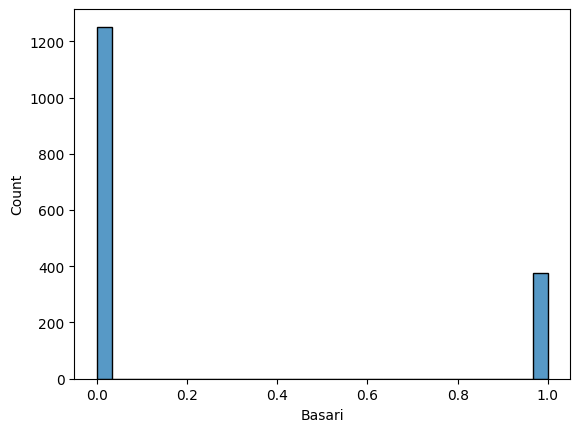

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Veriyi okuma
df = pd.read_csv("crowndfunding_result.csv")  # Verinizin adını doğru yazmalısınız

# Sınıf dağılımı
print(df["Basari"].value_counts())

# Histogram
sns.histplot(data=df, x="Basari", bins=30, kde=False)
#plt.title("Destek Oranı Dağılımı")
plt.show()

In [2]:
x = [1, 2, 3] 
print(x * 2)

[1, 2, 3, 1, 2, 3]


In [3]:
df.columns

Index(['Destek_Orani', 'Basari'], dtype='object')

In [69]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
from sklearn.feature_selection import SelectKBest, chi2, SelectFromModel, SequentialFeatureSelector
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE

# Dosya yolunu belirtin
file_path = "Raw_dataset_CF.xlsx"  # kendi dosya adınızı buraya yazın
df = pd.read_excel(file_path)
target_column = "basari_durumu"

In [17]:
file_path = "df_ml_cleaned_without_fuzzy.xlsx"
df_ml_cleaned = pd.read_excel(file_path)

In [35]:
df_ml_cleaned.describe().T.to_excel("df_describe_dataset.xlsx")

In [37]:
import os 

In [38]:
os.getcwd()

'C:\\Users\\Ugur Ejder\\Desktop\\crowdfunding'

# Comparasion ML on raw dataset without fuzzy, feature selection, smote

In [76]:
# Kernel sıfırlandığı için gerekli tüm kütüphaneler tekrar yükleniyor ve model karşılaştırması yeniden yapılacak
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

# Excel dosyasını yeniden oku
file_path = "df_ml_cleaned_without_fuzzy.xlsx"
df_ml_cleaned = pd.read_excel(file_path)

# Hedef sütun ve girdiler
target_column = "Etiket_sayisal_deger"
X = df_ml_cleaned.drop(columns=[target_column, 'Unnamed: 0', 'id'], errors='ignore').copy()
y = df_ml_cleaned[target_column]

# Kategorik sütunları sayısallaştır
for col in X.select_dtypes(include='object').columns:
    X[col] = LabelEncoder().fit_transform(X[col].astype(str))

# Eğitim/test bölme
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modeller tanımlanıyor
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "KNN": KNeighborsClassifier(),
    "MLP": MLPClassifier(random_state=42, max_iter=500)
}

# Performansları tutacağımız liste
baseline_results_full = []

# Her bir modeli eğit ve metrikleri hesapla
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='macro')
    rec = recall_score(y_test, y_pred, average='macro')
    prec = precision_score(y_test, y_pred, average='macro')
    baseline_results_full.append({
        "Model": name,
        "Accuracy": acc,
        "F1_score_macro": f1,
        "Recall": rec,
        "Precision": prec
    })

# Sonuçları tabloya dök
baseline_df_full = pd.DataFrame(baseline_results_full)
baseline_df_full

,Model,Accuracy,F1_score_macro,Recall,Precision
0,Random Forest,0.944785,0.926679,0.923298,0.930209
1,Gradient Boosting,0.938650,0.919183,0.919183,0.919183
2,KNN,0.889571,0.850915,0.842630,0.860429
3,MLP,0.920245,0.898091,0.910804,0.887444


# Comparasion ML on raw dataset without fuzzy,smote

In [78]:
selected_chi2_features  = ['kac_proje_destekledi', 'video_uzunlugu', 'gorsel_sayisi', 'guncellemeler', 'yorumlar', 'destekci_sayisi', 'ekip_kisi_sayisi', 'sm_takipci', 'icerik_kelime_sayisi', 'toplanan_tutar']
selected_corr_features = ['kitle_fonlamasi_turu', 'proje_sahibi_cinsiyet', 'kac_proje_destekledi', 'gun_sayisi', 'tanitim_videosu', 'video_uzunlugu', 'gorsel_sayisi', 'guncellemeler', 'yorumlar', 'destekci_sayisi', 'odul_sayisi', 'ekip_kisi_sayisi', 'web_sitesi', 'sosyal_medya', 'sm_sayisi', 'sm_takipci', 'icerik_kelime_sayisi', 'toplanan_tutar']
selected_lasso_features  = ['platform_adi', 'kitle_fonlamasi_turu', 'kategori', 'fon_sekli', 'proje_sahibi_cinsiyet', 'kac_proje_destekledi', 'kac_proje_takiminda', 'konum', 'bolge', 'yil', 'gun_sayisi', 'tanitim_videosu', 'video_uzunlugu', 'gorsel_sayisi', 'sss', 'guncellemeler', 'yorumlar', 'destekci_sayisi', 'odul_sayisi', 'ekip_kisi_sayisi', 'web_sitesi', 'sosyal_medya', 'sm_sayisi', 'sm_takipci', 'etiket_sayisi', 'icerik_kelime_sayisi', 'toplanan_tutar']
selected_xgb_features = ['destekci_sayisi', 'toplanan_tutar', 'yorumlar', 'fon_sekli', 'tanitim_videosu', 'kac_proje_takiminda', 'guncellemeler', 'proje_sahibi_cinsiyet', 'video_uzunlugu', 'icerik_kelime_sayisi', 'web_sitesi', 'gun_sayisi', 'konum', 'gorsel_sayisi', 'odul_sayisi', 'ekip_kisi_sayisi', 'sss', 'sm_takipci', 'kac_proje_destekledi', 'yil', 'bolge', 'kategori', 'sosyal_medya', 'etiket_sayisi', 'sm_sayisi', 'platform_adi']
selected_rfe_features = ['kategori', 'yil', 'video_uzunlugu', 'gorsel_sayisi', 'guncellemeler', 'destekci_sayisi', 'odul_sayisi', 'sm_takipci', 'icerik_kelime_sayisi', 'toplanan_tutar']

In [82]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
from sklearn.feature_selection import SelectKBest, chi2, SelectFromModel, SequentialFeatureSelector
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE


# 1. Excel dosyasını yeniden oku
file_path = "df_ml_cleaned_without_fuzzy.xlsx"
df_ml_cleaned = pd.read_excel(file_path)

# 2. Hedef sütun ve girdiler
target_column = "Etiket_sayisal_deger"
X = df_ml_cleaned.drop(columns=[target_column, 'Unnamed: 0', 'id'], errors='ignore').copy()
y = df_ml_cleaned[target_column]

# 3. Metin sütunlarını çıkar
X = X.select_dtypes(include=['number', 'object']).copy()
X = X.drop(columns=['proje_adi', 'proje_aciklamasi'], errors='ignore')

# 4. Kategorik sütunları label encode et
for col in X.select_dtypes(include='object').columns:
    X[col] = LabelEncoder().fit_transform(X[col].astype(str))

# 5. Train/test ayır
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Özellik ve hedef ayrımı
X = df.drop(columns=[target_column, 'Unnamed: 0', 'id'], errors='ignore')
y = df[target_column]

# Kategorik verileri sayısallaştır
for col in X.select_dtypes(include='object').columns:
    X[col] = LabelEncoder().fit_transform(X[col].astype(str))

# 1. Chi-Square
'''
chi2_selector = SelectKBest(score_func=chi2, k=10)
chi2_selector.fit(X_resampled, y_resampled)
chi2_features = X.columns[chi2_selector.get_support()].tolist()
'''
chi2_features = selected_chi2_features

# 2. Pearson Correlation
'''
df_corr = X_resampled.copy()
df_corr[target_column] = y_resampled
corr_matrix = df_corr.corr()[target_column].drop(target_column)
pearson_features = corr_matrix[abs(corr_matrix) > 0.1].index.tolist()
'''
pearson_features =selected_corr_features

# 3. Lasso
'''
lasso_model = LogisticRegression(penalty='l1', solver='liblinear', random_state=42)
lasso_selector = SelectFromModel(lasso_model).fit(X_resampled, y_resampled)
lasso_features = X.columns[lasso_selector.get_support()].tolist()
'''
lasso_features = selected_lasso_features

# 4. XGBoost Feature Importance
'''
xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss', n_estimators=50)
xgb_model.fit(X_resampled, y_resampled)
xgb_importance = pd.Series(xgb_model.feature_importances_, index=X.columns)
xgb_features = xgb_importance[xgb_importance > 0].sort_values(ascending=False).index.tolist()
'''
xgb_features = selected_xgb_features

# 5. Sequential Feature Selector
'''
sfs_model = RandomForestClassifier(random_state=42)
sfs_selector = SequentialFeatureSelector(sfs_model, n_features_to_select=10, direction='forward', scoring='accuracy', cv=3)
sfs_selector.fit(X_resampled, y_resampled)
sfs_features = X.columns[sfs_selector.get_support()].tolist()
'''
sfs_features = selected_rfe_features


# Tüm feature setleri
feature_sets = {
    "Chi-Square": chi2_features,
    "Pearson Correlation": pearson_features,
    "Lasso (L1)": lasso_features,
    "XGBoost Importance": xgb_features,
    "RFE": sfs_features
}

# Makine öğrenme modelleri
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "KNN": KNeighborsClassifier(),
    "MLP": MLPClassifier(random_state=42, max_iter=500)
}

# Tüm sonuçları topla
results = []

for fs_name, features in feature_sets.items():
    X_selected = X[features]
    X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)
    for model_name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        results.append({
            "Feature_Selection": fs_name,
            "Model": model_name,
            "Accuracy": accuracy_score(y_test, y_pred),
            "F1_score_macro": f1_score(y_test, y_pred, average='macro'),
            "Recall": recall_score(y_test, y_pred, average='macro'),
            "Precision": precision_score(y_test, y_pred, average='macro')
        })

# Sonuçları göster
results_df = pd.DataFrame(results)


      Feature_Selection              Model  Accuracy  F1_score_macro  \
0            Chi-Square      Random Forest  0.917178        0.893782   
1            Chi-Square  Gradient Boosting  0.926380        0.903778   
2            Chi-Square                KNN  0.889571        0.850915   
3            Chi-Square                MLP  0.889571        0.849639   
4   Pearson Correlation      Random Forest  0.935583        0.915476   
5   Pearson Correlation  Gradient Boosting  0.920245        0.895760   
6   Pearson Correlation                KNN  0.889571        0.850915   
7   Pearson Correlation                MLP  0.877301        0.829969   
8            Lasso (L1)      Random Forest  0.953988        0.938650   
9            Lasso (L1)  Gradient Boosting  0.938650        0.919183   
10           Lasso (L1)                KNN  0.889571        0.850915   
11           Lasso (L1)                MLP  0.901840        0.878045   
12   XGBoost Importance      Random Forest  0.953988        0.93

In [83]:
results_df

,Feature_Selection,Model,Accuracy,F1_score_macro,Recall,Precision
0,Chi-Square,Random Forest,0.917178,0.893782,0.904780,0.884369
1,Chi-Square,Gradient Boosting,0.926380,0.903778,0.906986,0.900708
2,Chi-Square,KNN,0.889571,0.850915,0.842630,0.860429
3,Chi-Square,MLP,0.889571,0.849639,0.838663,0.862842
4,Pearson Correlation,Random Forest,0.935583,0.915476,0.917125,0.913863
5,Pearson Correlation,Gradient Boosting,0.920245,0.895760,0.898904,0.892751
6,Pearson Correlation,KNN,0.889571,0.850915,0.842630,0.860429
7,Pearson Correlation,MLP,0.877301,0.829969,0.814567,0.850428
8,Lasso (L1),Random Forest,0.953988,0.938650,0.933437,0.944207
9,Lasso (L1),Gradient Boosting,0.938650,0.919183,0.919183,0.919183


# Comparasion ML on raw dataset without fuzzy, feature selection

In [84]:

# Kernel sıfırlandığı için gerekli tüm kütüphaneler tekrar yükleniyor ve model karşılaştırması yeniden yapılacak
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

# Excel dosyasını yeniden oku
file_path = "df_ml_cleaned_without_fuzzy.xlsx"
df_ml_cleaned = pd.read_excel(file_path)

# Hedef sütun ve girdiler
target_column = "Etiket_sayisal_deger"
X = df_ml_cleaned.drop(columns=[target_column, 'Unnamed: 0', 'id'], errors='ignore').copy()
y = df_ml_cleaned[target_column]

# Kategorik sütunları sayısallaştır
for col in X.select_dtypes(include='object').columns:
    X[col] = LabelEncoder().fit_transform(X[col].astype(str))

# Eğitim/test bölme
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# SMOTE ile sınıfları dengele
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)


# Modeller tanımlanıyor
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "KNN": KNeighborsClassifier(),
    "MLP": MLPClassifier(random_state=42, max_iter=500)
}

# Performansları tutacağımız liste
baseline_results_full = []

# Her bir modeli eğit ve metrikleri hesapla
for name, model in models.items():
    model.fit(X_resampled, y_resampled)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='macro')
    rec = recall_score(y_test, y_pred, average='macro')
    prec = precision_score(y_test, y_pred, average='macro')
    baseline_results_full.append({
        "Model": name,
        "Accuracy": acc,
        "F1_score_macro": f1,
        "Recall": rec,
        "Precision": prec
    })

# Sonuçları tabloya dök
baseline_df_full = pd.DataFrame(baseline_results_full)
baseline_df_full




,Model,Accuracy,F1_score_macro,Recall,Precision
0,Random Forest,0.941718,0.924118,0.929173,0.919380
1,Gradient Boosting,0.941718,0.926328,0.945039,0.911592
2,KNN,0.904908,0.882252,0.908449,0.864513
3,MLP,0.736196,0.445710,0.501760,0.515898


# Comparasion ML on raw dataset,balance without fuzzy

In [85]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
from sklearn.feature_selection import SelectKBest, chi2, SelectFromModel, SequentialFeatureSelector
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE


# 1. Excel dosyasını yeniden oku
file_path = "df_ml_cleaned_without_fuzzy.xlsx"
df_ml_cleaned = pd.read_excel(file_path)

# 2. Hedef sütun ve girdiler
target_column = "Etiket_sayisal_deger"
X = df_ml_cleaned.drop(columns=[target_column, 'Unnamed: 0', 'id'], errors='ignore').copy()
y = df_ml_cleaned[target_column]

# 3. Metin sütunlarını çıkar
X = X.select_dtypes(include=['number', 'object']).copy()
X = X.drop(columns=['proje_adi', 'proje_aciklamasi'], errors='ignore')

# 4. Kategorik sütunları label encode et
for col in X.select_dtypes(include='object').columns:
    X[col] = LabelEncoder().fit_transform(X[col].astype(str))

# 5. Train/test ayır
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)


# 1. Chi-Square
'''
chi2_selector = SelectKBest(score_func=chi2, k=10)
chi2_selector.fit(X_resampled, y_resampled)
chi2_features = X.columns[chi2_selector.get_support()].tolist()
'''
chi2_features = selected_chi2_features

# 2. Pearson Correlation
'''
df_corr = X_resampled.copy()
df_corr[target_column] = y_resampled
corr_matrix = df_corr.corr()[target_column].drop(target_column)
pearson_features = corr_matrix[abs(corr_matrix) > 0.1].index.tolist()
'''
pearson_features =selected_corr_features

# 3. Lasso
'''
lasso_model = LogisticRegression(penalty='l1', solver='liblinear', random_state=42)
lasso_selector = SelectFromModel(lasso_model).fit(X_resampled, y_resampled)
lasso_features = X.columns[lasso_selector.get_support()].tolist()
'''
lasso_features = selected_lasso_features

# 4. XGBoost Feature Importance
'''
xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss', n_estimators=50)
xgb_model.fit(X_resampled, y_resampled)
xgb_importance = pd.Series(xgb_model.feature_importances_, index=X.columns)
xgb_features = xgb_importance[xgb_importance > 0].sort_values(ascending=False).index.tolist()
'''
xgb_features = selected_xgb_features

# 5. Sequential Feature Selector
'''
sfs_model = RandomForestClassifier(random_state=42)
sfs_selector = SequentialFeatureSelector(sfs_model, n_features_to_select=10, direction='forward', scoring='accuracy', cv=3)
sfs_selector.fit(X_resampled, y_resampled)
sfs_features = X.columns[sfs_selector.get_support()].tolist()
'''
sfs_features = selected_rfe_features


# Tüm feature setleri
feature_sets = {
    "Chi-Square": chi2_features,
    "Pearson Correlation": pearson_features,
    "Lasso (L1)": lasso_features,
    "XGBoost Importance": xgb_features,
    "RFE": sfs_features
}

# Makine öğrenme modelleri
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "KNN": KNeighborsClassifier(),
    "MLP": MLPClassifier(random_state=42, max_iter=500)
}

# Tüm sonuçları topla
results = []

for fs_name, features in feature_sets.items():
    X_selected = X_resampled[features]
    X_train, X_test, y_train, y_test = train_test_split(X_selected, y_resampled, test_size=0.2, random_state=42)
    for model_name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        results.append({
            "Feature_Selection": fs_name,
            "Model": model_name,
            "Accuracy": accuracy_score(y_test, y_pred),
            "F1_score_macro": f1_score(y_test, y_pred, average='macro'),
            "Recall": recall_score(y_test, y_pred, average='macro'),
            "Precision": precision_score(y_test, y_pred, average='macro')
        })

# Sonuçları göster
results_df = pd.DataFrame(results)

In [86]:
results_df

,Feature_Selection,Model,Accuracy,F1_score_macro,Recall,Precision
0,Chi-Square,Random Forest,0.962871,0.962705,0.961803,0.964575
1,Chi-Square,Gradient Boosting,0.955446,0.955313,0.954915,0.955900
2,Chi-Square,KNN,0.920792,0.920463,0.919751,0.921905
3,Chi-Square,MLP,0.866337,0.866324,0.868502,0.869300
4,Pearson Correlation,Random Forest,0.970297,0.970173,0.969354,0.971764
5,Pearson Correlation,Gradient Boosting,0.962871,0.962729,0.962024,0.964018
6,Pearson Correlation,KNN,0.925743,0.925480,0.924932,0.926440
7,Pearson Correlation,MLP,0.863861,0.859266,0.857513,0.896617
8,Lasso (L1),Random Forest,0.972772,0.972668,0.971945,0.973981
9,Lasso (L1),Gradient Boosting,0.972772,0.972684,0.972166,0.973503


In [3]:
xl = pd.ExcelFile("crowdfunding_excel_2.xlsx")
df_excel = xl.parse('turkishCF')


In [4]:
df_excel.head()

,id,platform_adi,kitle_fonlamasi_turu,kategori,fon_sekli,proje_adi,proje_sahibi,proje_sahibi_cinsiyet,kac_proje_destekledi,kac_projeye_abone,...,sm_takipci,etiket_sayisi,icerik_kelime_sayisi,proje_aciklamasi,hedef_miktari,toplanan_tutar,destek_orani_yuzde,basari_durumu,Destek_Orani,Basari
0,1,fongogo,ödül,diğer,ya hep ya hiç,Gerçek Gizlidir Filmleri,Lob Ekibi,belirsiz,1,0,...,274,0,301,Türkiye’de ilk kez her aşaması ‘online’ olarak...,40000,54410,1.36,başarılı,136,1
1,2,fongogo,ödül,diğer,ya hep ya hiç,Fongogo - Hayat Bulsun!,Fongogo Team,belirsiz,3,0,...,5634,0,167,"Fongogo ekibi olarak büyümek, daha geniş kitle...",50000,50110,1.00,başarılı,100,1
2,3,fongogo,ödül,diğer,ya hep ya hiç,"PAYLAŞIMIN, SEVGİNİN VE ÇOCUKLARIN İYİLİK EVİ ...",SİNEM CAN,kadın,0,0,...,510,4,413,Çocuklara her şeyin ücretsiz olduğu iyilik evi...,47000,47850,1.01,başarılı,101,1
3,4,fongogo,ödül,diğer,ya hep ya hiç,Türk Kadının 100.yıl Seyri,Deniz Tutkusu Seyirde,kadın,0,0,...,3338,5,287,‘Sözde değil Özde İzindeyiz ‘ sloganıyla Atatü...,35000,35450,1.01,başarılı,101,1
4,5,fongogo,ödül,diğer,ya hep ya hiç,Doğadaki Çocuk,Seren Kutadgu,kadın,2,0,...,144,3,571,İstanbul'daki çocuk yuvalarında yaşayan dezava...,30000,31250,1.04,başarılı,104,1


In [6]:
df["Destek_Orani"].max()


11300

In [ ]:
#!pip install scikit-fuzzy

In [24]:
import pandas as pd

# Veriyi içeri aktarın
df = pd.read_csv("crowndfunding_result.csv")  # Örnek: csv'ye kaydettiğinizi varsayıyorum
#df = destek_oranı_np

min_val = df["Destek_Orani"].min()
max_val = df["Destek_Orani"].max()
q1 = df["Destek_Orani"].quantile(0.25)
q2 = df["Destek_Orani"].quantile(0.5)
q3 = df["Destek_Orani"].quantile(0.75)

print(f"Min: {min_val}, Q1: {q1}, Medyan: {q2}, Q3: {q3}, Max: {max_val}")

Min: 0, Q1: 0.0, Medyan: 2.0, Q3: 43.5, Max: 11300


In [7]:
def cap_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df.loc[:, column] = df[column].clip(lower=lower_bound, upper=upper_bound)
    return df

In [10]:
df_excel.columns

Index(['id', 'platform_adi', 'kitle_fonlamasi_turu', 'kategori', 'fon_sekli',
       'proje_adi', 'proje_sahibi', 'proje_sahibi_cinsiyet',
       'kac_proje_destekledi', 'kac_projeye_abone', 'kac_projenin_sahibi',
       'kac_proje_takiminda', 'konum', 'bolge', 'yil', 'proje_baslama_tarihi',
       'proje_bitis_tarihi', 'gun_sayisi', 'tanitim_videosu', 'video_uzunlugu',
       'gorsel_sayisi', 'sss', 'guncellemeler', 'yorumlar', 'destekci_sayisi',
       'odul_sayisi', 'ekip_kisi_sayisi', 'web_sitesi', 'sosyal_medya',
       'sm_sayisi', 'sm_takipci', 'etiket_sayisi', 'icerik_kelime_sayisi',
       'proje_aciklamasi', 'hedef_miktari', 'toplanan_tutar',
       'destek_orani_yuzde', 'basari_durumu', 'Destek_Orani', 'Basari'],
      dtype='object')

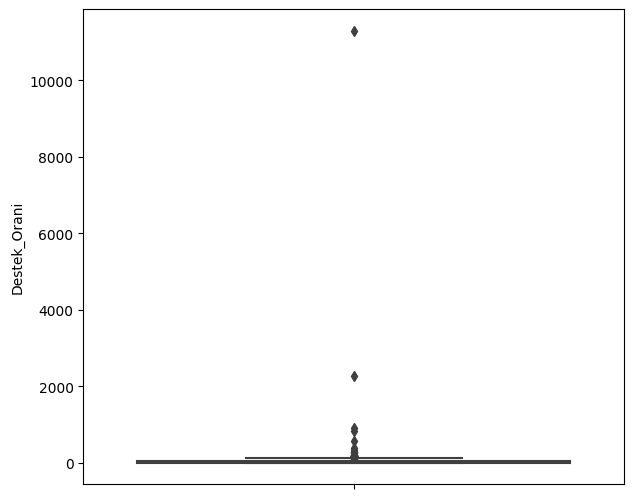

In [11]:
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
sns.boxplot(y=df_excel["Destek_Orani"])
'''
for i, col in enumerate(columns_to_clean, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(y=df_cleaned[col])
    plt.title(f'Boxplot of {col} (Cleaned)')
'''

plt.tight_layout()
plt.show()

C:\Users\Ugur Ejder\AppData\Local\Temp\ipykernel_14356\236244158.py:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[108.75 100.   101.   ... 100.   100.   100.  ]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[:, column] = df[column].clip(lower=lower_bound, upper=upper_bound)


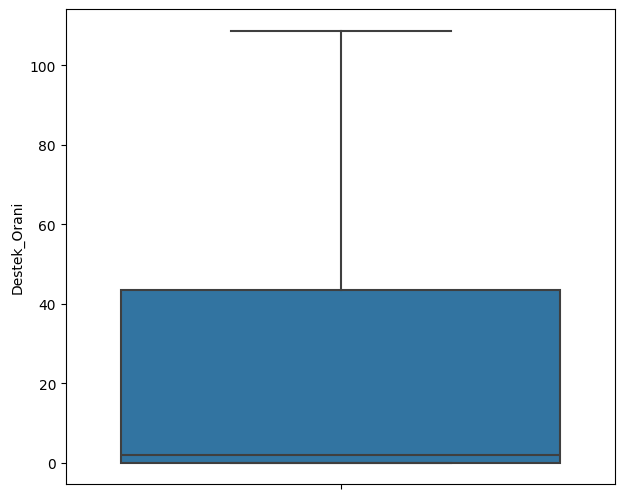

In [12]:
df_cleaned = cap_outliers_iqr(df_excel, "Destek_Orani")

# Visual check with boxplots on cleaned data:
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
sns.boxplot(y=df_cleaned["Destek_Orani"])

'''
for i, col in enumerate(columns_to_clean, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(y=df_cleaned[col])
    plt.title(f'Boxplot of {col} (Cleaned)')
'''

plt.tight_layout()
plt.show()

In [15]:
df_cleaned.sort_values(by="Destek_Orani" ,ascending=False).head()

,id,platform_adi,kitle_fonlamasi_turu,kategori,fon_sekli,proje_adi,proje_sahibi,proje_sahibi_cinsiyet,kac_proje_destekledi,kac_projeye_abone,...,sm_takipci,etiket_sayisi,icerik_kelime_sayisi,proje_aciklamasi,hedef_miktari,toplanan_tutar,destek_orani_yuzde,basari_durumu,Destek_Orani,Basari
0,1,fongogo,ödül,diğer,ya hep ya hiç,Gerçek Gizlidir Filmleri,Lob Ekibi,belirsiz,1,0,...,274,0,301,Türkiye’de ilk kez her aşaması ‘online’ olarak...,40000,54410,1.36,başarılı,108.75,1
100,101,fongogo,ödül,çevre,hepsi kalsın,Good4trust.org - Güven için İyilik - Doğa ve İ...,Good4Trust .org,belirsiz,0,0,...,7981,0,290,Destek olarak doğa ve insan dostu ürünlere kol...,14000,15600,1.11,başarılı,108.75,1
391,392,fongogo,ödül,film-video-fotoğraf,ya hep ya hiç,Zamanımızın Bir Kahramanı,Miraç Atabey,erkek,0,0,...,735,0,180,Zamanımızın Bir Kahramanı adlı uzun metraj sin...,5000,7400,1.48,başarılı,108.75,1
1070,1071,fongogo,ödül,diğer,ya hep ya hiç,Türkiye Matematik Kulübü,Melih Mert Oskay,erkek,1,0,...,1100,5,355,"Türkiye Matematik Kulübü, matematikle ilgili e...",1500,2215,1.47,başarılı,108.75,1
1075,1076,fonbulucu,ödül,çevre,ya hep ya hiç,fonbulucu.com'a ve Projelere Destek,fonbulucu,belirsiz,12,0,...,14600,0,267,Fikirlere Değer Veren Türkiye'nin Kitle Fonlam...,10000,56666,5.67,başarılı,108.75,1


In [17]:
import skfuzzy as fuzz
import numpy as np

In [43]:
df_cleaned.head()
destek_oranı_np =  np.array(df_cleaned["Destek_Orani"]) 
destek_oranı_np_order = np.arange(0, 1628, 1)

In [19]:
df_cleaned["Destek_Orani"].max()

108.75

<Axes: xlabel='destek_oranı_list', ylabel='Destek_Orani'>

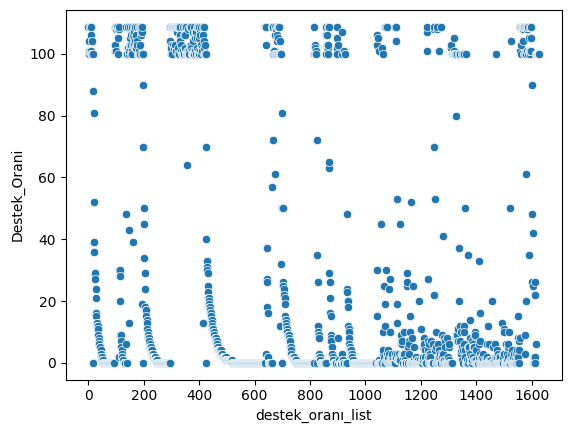

In [20]:
df_cleaned["destek_oranı_list"]=destek_oranı_np_order
sns.scatterplot(x="destek_oranı_list", y="Destek_Orani", data=df_cleaned)

# sadeleşmiş datayı komple excel e aktar

In [25]:
df_cleaned.to_excel("df_cleaned.xlsx",sheet_name='df_cleaned')

In [92]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
import shap
import matplotlib.pyplot as plt

# 1. Excel dosyasını oku
df_ml = pd.read_excel("df_ml_cleaned_2.xlsx")


# Hedef ve özelliklerin ayrılması
target_column = 'Labelled Class'
X = df_ml.drop(columns=[target_column])
y = df_ml[target_column]

# Gereksiz metin sütunlarını çıkar
#X = X.select_dtypes(include=['number', 'object']).copy()
#X = X.drop(columns=['Project Name', 'Project description'], errors='ignore')

# Kategorik verileri sayısala dönüştür
for col in X.select_dtypes(include='object').columns:
    X[col] = LabelEncoder().fit_transform(X[col].astype(str))

In [42]:
X.describe().T.to_excel("df_describe_dataset.xlsx",sheet_name='df_describe_dataset')

In [93]:
X.describe().T

,count,mean,std,min,25%,50%,75%,max
Platform Name,1628.0,3.404177,1.010106,0.0,3.00,4.0,4.00,5.0
Crowdfunding Type,1628.0,0.993857,0.078157,0.0,1.00,1.0,1.00,1.0
Category,1628.0,6.924447,5.028114,0.0,3.00,6.0,13.00,16.0
Fund Shape,1628.0,0.926904,0.260374,0.0,1.00,1.0,1.00,1.0
Project Owner Gender,1628.0,1.148649,0.522409,0.0,1.00,1.0,1.00,2.0
Project Supported Count,1628.0,0.429361,2.225029,0.0,0.00,0.0,0.00,31.0
Project Subscribed,1628.0,0.000614,0.024784,0.0,0.00,0.0,0.00,1.0
Project Team Count,1628.0,0.052826,0.244744,0.0,0.00,0.0,0.00,4.0
Location,1628.0,21.793612,12.531918,0.0,13.00,26.0,26.00,65.0
Region,1628.0,4.872850,3.072438,0.0,1.00,6.0,8.00,9.0


In [94]:
X.head()

,Platform Name,Crowdfunding Type,Category,Fund Shape,Project Owner Gender,Project Supported Count,Project Subscribed,Project Team Count,Location,Region,...,Supporter Count,Reward Count,Team Member Count,Web Site,Social Media,Social Media Count,Social Media Followers,Tags Count,Content Words Count,Supportted Amount
0,4,1,1,1,0,1,0,0,26,8,...,150,11,4,1,0,3,274,0,301,54410
1,4,1,1,1,0,3,0,0,26,8,...,51,11,7,1,0,3,5634,0,167,50110
2,4,1,1,1,2,0,0,1,13,1,...,25,6,2,0,0,2,510,4,413,47850
3,4,1,1,1,2,0,0,0,42,3,...,45,7,1,0,0,2,3338,5,287,35450
4,4,1,1,1,2,2,0,0,26,8,...,105,8,6,1,0,1,144,3,571,31250


In [44]:
os.getcwd()

'C:\\Users\\Ugur Ejder\\Desktop\\crowdfunding'

<Axes: >

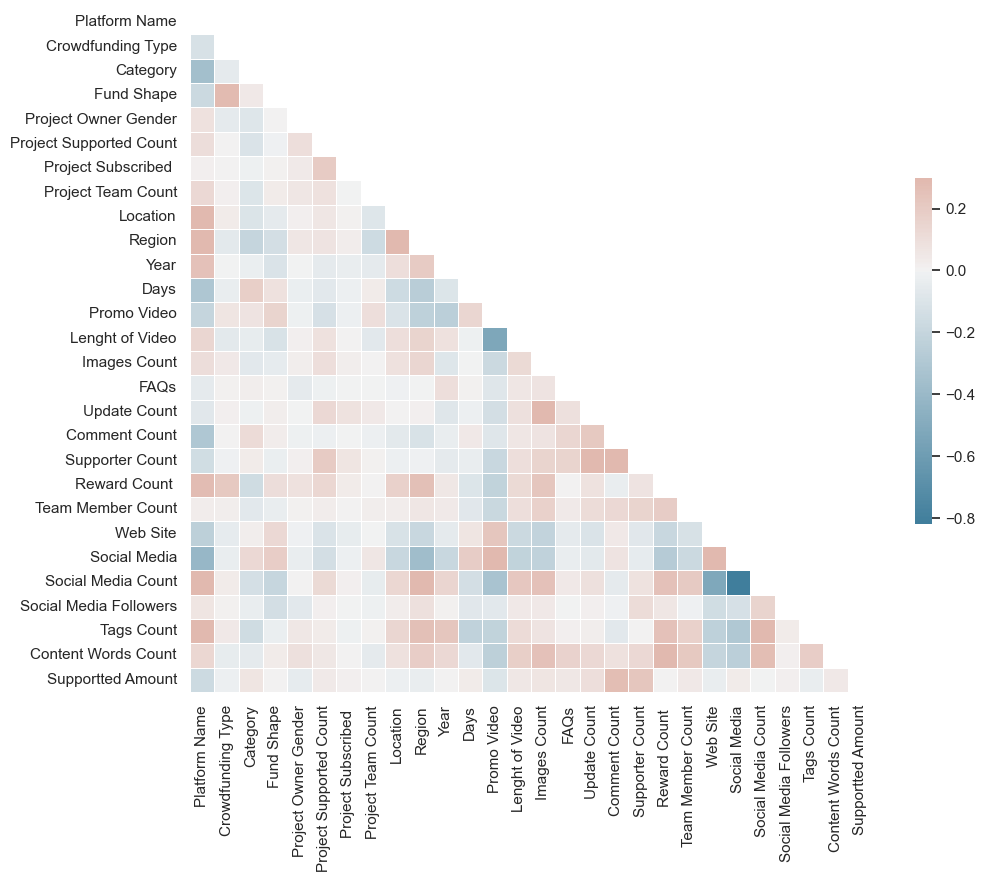

In [95]:
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="white")

d=X
# Compute the correlation matrix
corr = d.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

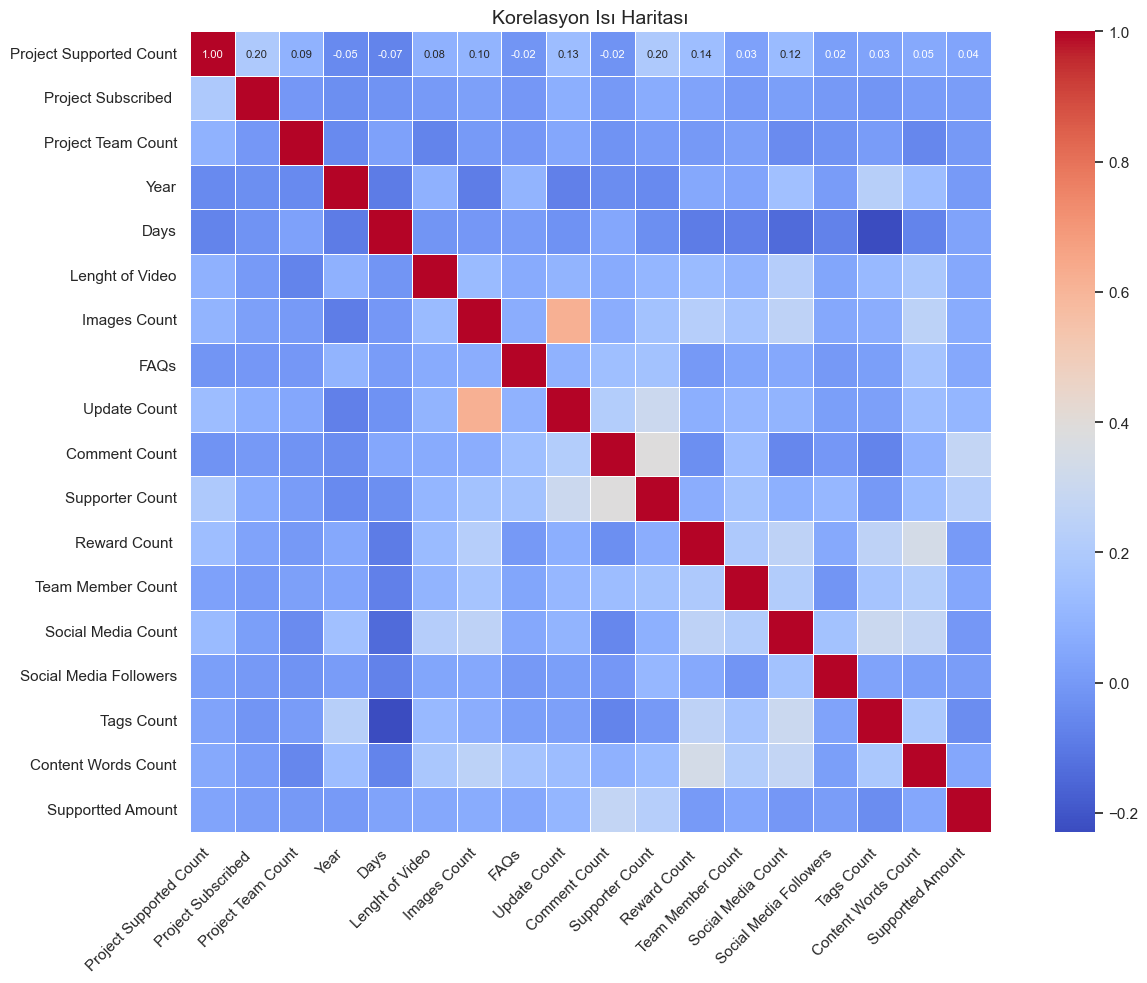

In [102]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sayısal sütunların korelasyon matrisi
numeric_df = X.select_dtypes(include=['int64', 'float64'])
corr = numeric_df.corr()

# Harita çizimi
plt.figure(figsize=(14, 10))
sns.heatmap(corr, 
            annot=True,      # sayıları göster
            fmt=".2f",        # iki ondalık basamak
            cmap="coolwarm", 
            square=True, 
            linewidths=0.5,   # hücre aralarına çizgi
            annot_kws={"size": 8})  # yazı boyutu
plt.title("Korelasyon Isı Haritası", fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [104]:
numeric_df

,Project Supported Count,Project Subscribed,Project Team Count,Year,Days,Lenght of Video,Images Count,FAQs,Update Count,Comment Count,Supporter Count,Reward Count,Team Member Count,Social Media Count,Social Media Followers,Tags Count,Content Words Count,Supportted Amount
0,1,0,0,2014,62,104,1,0,4,0,150,11,4,3,274,0,301,54410
1,3,0,0,2015,60,0,12,0,0,0,51,11,7,3,5634,0,167,50110
2,0,0,1,2017,60,60,8,1,1,1,25,6,2,2,510,4,413,47850
3,0,0,0,2019,60,67,6,0,0,0,45,7,1,2,3338,5,287,35450
4,2,0,0,2019,60,149,5,0,0,0,105,8,6,1,144,3,571,31250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1623,0,0,0,2017,60,0,1,0,0,0,50,1,1,0,0,0,221,50000
1624,0,0,0,2017,60,0,1,0,0,0,15,1,1,0,0,0,157,15000
1625,0,0,0,2017,60,0,1,0,0,0,10,1,1,0,0,0,159,10000
1626,0,0,0,2017,60,0,1,0,0,0,23,1,1,0,0,0,287,25000


# destek oranları ile etiketlemeyi fuzzy ile bitir. Buradan 1 adet grafik oluştur.

In [27]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

# 1. Giriş ve çıkış değişkenleri
destek_orani = ctrl.Antecedent(np.arange(0, 110, 1), 'Destek_Orani')
basari = ctrl.Consequent(np.arange(0, 4, 1), 'Basari')

# 2. Üyelik fonksiyonları
destek_orani['destek_yok'] = fuzz.trimf(destek_orani.universe, [0, 0, 30])
destek_orani['dusuk_destek'] = fuzz.trimf(destek_orani.universe, [20, 40, 60])
destek_orani['tam_destek'] = fuzz.trimf(destek_orani.universe, [50, 70, 100])
destek_orani['cok_yuksek_destek'] = fuzz.trapmf(destek_orani.universe, [80, 100, 109, 109])

basari['basarisiz'] = fuzz.trimf(basari.universe, [0, 0, 1])
basari['orta'] = fuzz.trimf(basari.universe, [0.5, 1, 1.5])
basari['basarili'] = fuzz.trimf(basari.universe, [1.5, 2, 2.5])
basari['cok_basarili'] = fuzz.trimf(basari.universe, [2.5, 3, 3])

# 3. Kurallar
rule1 = ctrl.Rule(destek_orani['destek_yok'], basari['basarisiz'])
rule2 = ctrl.Rule(destek_orani['dusuk_destek'], basari['orta'])
rule3 = ctrl.Rule(destek_orani['tam_destek'], basari['basarili'])
rule4 = ctrl.Rule(destek_orani['cok_yuksek_destek'], basari['cok_basarili'])

# 4. Sistem tanımı
basari_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4])

# 5. Etiketleme fonksiyonu
def etiketle(basari_degeri):
    if basari_degeri < 1:
        return 'basarisiz'
    elif basari_degeri < 1.5:
        return 'orta'
    elif basari_degeri < 2.5:
        return 'basarili'
    else:
        return 'cok_basarili'

# 6. Örnek veri testi
ornek_veriler = destek_oranı_np
tahminler = []

for deger in ornek_veriler:
    if destek_orani.universe.min() <= deger <= destek_orani.universe.max():
        sim = ctrl.ControlSystemSimulation(basari_ctrl)
        deger = round(deger)
        print("üretilen deger : " + str(deger))
        sim.input['Destek_Orani'] = deger
        print("üretilen deger : " + str(deger))
        sim.compute()
        sayisal = sim.output['Basari']
        print(str(sayisal))
        etiket = etiketle(sayisal)
        tahminler.append((deger, round(sayisal, 2), etiket))
    else:
       
        tahminler.append((deger, None, 'Geçersiz değer'))
    print("--------------------")
# 7. Sonuçları yazdır
print("Destek Oranı | Sayısal Başarı | Sınıf Etiketi")
for d, s, e in tahminler:
    #print(f"{d:^13} | {str(s):^15} | {e:^15}")
    print(f" {e:^15}")

üretilen deger : 109
üretilen deger : 109
2.6666666666666665
--------------------
üretilen deger : 100
üretilen deger : 100
2.6666666666666665
--------------------
üretilen deger : 101
üretilen deger : 101
2.6666666666666665
--------------------
üretilen deger : 101
üretilen deger : 101
2.6666666666666665
--------------------
üretilen deger : 104
üretilen deger : 104
2.6666666666666665
--------------------
üretilen deger : 109
üretilen deger : 109
2.6666666666666665
--------------------
üretilen deger : 109
üretilen deger : 109
2.6666666666666665
--------------------
üretilen deger : 101
üretilen deger : 101
2.6666666666666665
--------------------
üretilen deger : 101
üretilen deger : 101
2.6666666666666665
--------------------
üretilen deger : 100
üretilen deger : 100
2.6666666666666665
--------------------
üretilen deger : 106
üretilen deger : 106
2.6666666666666665
--------------------
üretilen deger : 109
üretilen deger : 109
2.6666666666666665
--------------------
üretilen deger :

2.6666666666666665
--------------------
üretilen deger : 103
üretilen deger : 103
2.6666666666666665
--------------------
üretilen deger : 102
üretilen deger : 102
2.6666666666666665
--------------------
üretilen deger : 109
üretilen deger : 109
2.6666666666666665
--------------------
üretilen deger : 109
üretilen deger : 109
2.6666666666666665
--------------------
üretilen deger : 104
üretilen deger : 104
2.6666666666666665
--------------------
üretilen deger : 102
üretilen deger : 102
2.6666666666666665
--------------------
üretilen deger : 106
üretilen deger : 106
2.6666666666666665
--------------------
üretilen deger : 102
üretilen deger : 102
2.6666666666666665
--------------------
üretilen deger : 103
üretilen deger : 103
2.6666666666666665
--------------------
üretilen deger : 109
üretilen deger : 109
2.6666666666666665
--------------------
üretilen deger : 104
üretilen deger : 104
2.6666666666666665
--------------------
üretilen deger : 103
üretilen deger : 103
2.66666666666666

2.6666666666666665
--------------------
üretilen deger : 109
üretilen deger : 109
2.6666666666666665
--------------------
üretilen deger : 102
üretilen deger : 102
2.6666666666666665
--------------------
üretilen deger : 109
üretilen deger : 109
2.6666666666666665
--------------------
üretilen deger : 109
üretilen deger : 109
2.6666666666666665
--------------------
üretilen deger : 109
üretilen deger : 109
2.6666666666666665
--------------------
üretilen deger : 103
üretilen deger : 103
2.6666666666666665
--------------------
üretilen deger : 103
üretilen deger : 103
2.6666666666666665
--------------------
üretilen deger : 101
üretilen deger : 101
2.6666666666666665
--------------------
üretilen deger : 101
üretilen deger : 101
2.6666666666666665
--------------------
üretilen deger : 109
üretilen deger : 109
2.6666666666666665
--------------------
üretilen deger : 109
üretilen deger : 109
2.6666666666666665
--------------------
üretilen deger : 107
üretilen deger : 107
2.66666666666666

0.3611111111111111
--------------------
üretilen deger : 10
üretilen deger : 10
0.3611111111111111
--------------------
üretilen deger : 9
üretilen deger : 9
0.3564102564102564
--------------------
üretilen deger : 9
üretilen deger : 9
0.3564102564102564
--------------------
üretilen deger : 9
üretilen deger : 9
0.3564102564102564
--------------------
üretilen deger : 8
üretilen deger : 8
0.35204678362573094
--------------------
üretilen deger : 8
üretilen deger : 8
0.35204678362573094
--------------------
üretilen deger : 8
üretilen deger : 8
0.35204678362573094
--------------------
üretilen deger : 8
üretilen deger : 8
0.35204678362573094
--------------------
üretilen deger : 7
üretilen deger : 7
0.348048048048048
--------------------
üretilen deger : 7
üretilen deger : 7
0.348048048048048
--------------------
üretilen deger : 7
üretilen deger : 7
0.348048048048048
--------------------
üretilen deger : 7
üretilen deger : 7
0.348048048048048
--------------------
üretilen deger : 6
üre

0.3333333333333333
--------------------
üretilen deger : 0
üretilen deger : 0
0.3333333333333333
--------------------
üretilen deger : 0
üretilen deger : 0
0.3333333333333333
--------------------
üretilen deger : 0
üretilen deger : 0
0.3333333333333333
--------------------
üretilen deger : 0
üretilen deger : 0
0.3333333333333333
--------------------
üretilen deger : 0
üretilen deger : 0
0.3333333333333333
--------------------
üretilen deger : 0
üretilen deger : 0
0.3333333333333333
--------------------
üretilen deger : 0
üretilen deger : 0
0.3333333333333333
--------------------
üretilen deger : 0
üretilen deger : 0
0.3333333333333333
--------------------
üretilen deger : 0
üretilen deger : 0
0.3333333333333333
--------------------
üretilen deger : 0
üretilen deger : 0
0.3333333333333333
--------------------
üretilen deger : 0
üretilen deger : 0
0.3333333333333333
--------------------
üretilen deger : 0
üretilen deger : 0
0.3333333333333333
--------------------
üretilen deger : 0
üreti

0.38282828282828285
--------------------
üretilen deger : 14
üretilen deger : 14
0.38282828282828285
--------------------
üretilen deger : 13
üretilen deger : 13
0.3770025839793282
--------------------
üretilen deger : 12
üretilen deger : 12
0.37142857142857144
--------------------
üretilen deger : 11
üretilen deger : 11
0.3661246612466124
--------------------
üretilen deger : 11
üretilen deger : 11
0.3661246612466124
--------------------
üretilen deger : 10
üretilen deger : 10
0.3611111111111111
--------------------
üretilen deger : 10
üretilen deger : 10
0.3611111111111111
--------------------
üretilen deger : 9
üretilen deger : 9
0.3564102564102564
--------------------
üretilen deger : 9
üretilen deger : 9
0.3564102564102564
--------------------
üretilen deger : 9
üretilen deger : 9
0.3564102564102564
--------------------
üretilen deger : 9
üretilen deger : 9
0.3564102564102564
--------------------
üretilen deger : 9
üretilen deger : 9
0.3564102564102564
--------------------
üretile

2.6666666666666665
--------------------
üretilen deger : 0
üretilen deger : 0
0.3333333333333333
--------------------
üretilen deger : 8
üretilen deger : 8
0.35204678362573094
--------------------
üretilen deger : 1
üretilen deger : 1
0.3336917562724014
--------------------
üretilen deger : 1
üretilen deger : 1
0.3336917562724014
--------------------
üretilen deger : 1
üretilen deger : 1
0.3336917562724014
--------------------
üretilen deger : 1
üretilen deger : 1
0.3336917562724014
--------------------
üretilen deger : 0
üretilen deger : 0
0.3333333333333333
--------------------
üretilen deger : 0
üretilen deger : 0
0.3333333333333333
--------------------
üretilen deger : 0
üretilen deger : 0
0.3333333333333333
--------------------
üretilen deger : 0
üretilen deger : 0
0.3333333333333333
--------------------
üretilen deger : 0
üretilen deger : 0
0.3333333333333333
--------------------
üretilen deger : 0
üretilen deger : 0
0.3333333333333333
--------------------
üretilen deger : 0
üret

1.0
--------------------
üretilen deger : 109
üretilen deger : 109
2.6666666666666665
--------------------
üretilen deger : 109
üretilen deger : 109
2.6666666666666665
--------------------
üretilen deger : 3
üretilen deger : 3
0.33636363636363636
--------------------
üretilen deger : 1
üretilen deger : 1
0.3336917562724014
--------------------
üretilen deger : 3
üretilen deger : 3
0.33636363636363636
--------------------
üretilen deger : 1
üretilen deger : 1
0.3336917562724014
--------------------
üretilen deger : 4
üretilen deger : 4
0.338562091503268
--------------------
üretilen deger : 2
üretilen deger : 2
0.33472222222222225
--------------------
üretilen deger : 0
üretilen deger : 0
0.3333333333333333
--------------------
üretilen deger : 3
üretilen deger : 3
0.33636363636363636
--------------------
üretilen deger : 24
üretilen deger : 24
0.950877192982456
--------------------
üretilen deger : 0
üretilen deger : 0
0.3333333333333333
--------------------
üretilen deger : 27
üretile

2.6666666666666665
--------------------
üretilen deger : 101
üretilen deger : 101
2.6666666666666665
--------------------
üretilen deger : 109
üretilen deger : 109
2.6666666666666665
--------------------
üretilen deger : 4
üretilen deger : 4
0.338562091503268
--------------------
üretilen deger : 27
üretilen deger : 27
0.9740196078431372
--------------------
üretilen deger : 7
üretilen deger : 7
0.348048048048048
--------------------
üretilen deger : 2
üretilen deger : 2
0.33472222222222225
--------------------
üretilen deger : 1
üretilen deger : 1
0.3336917562724014
--------------------
üretilen deger : 6
üretilen deger : 6
0.34444444444444444
--------------------
üretilen deger : 3
üretilen deger : 3
0.33636363636363636
--------------------
üretilen deger : 0
üretilen deger : 0
0.3333333333333333
--------------------
üretilen deger : 3
üretilen deger : 3
0.33636363636363636
--------------------
üretilen deger : 0
üretilen deger : 0
0.3333333333333333
--------------------
üretilen deg

0.3333333333333333
--------------------
üretilen deger : 0
üretilen deger : 0
0.3333333333333333
--------------------
üretilen deger : 0
üretilen deger : 0
0.3333333333333333
--------------------
üretilen deger : 0
üretilen deger : 0
0.3333333333333333
--------------------
üretilen deger : 1
üretilen deger : 1
0.3336917562724014
--------------------
üretilen deger : 35
üretilen deger : 35
1.0
--------------------
üretilen deger : 5
üretilen deger : 5
0.3412698412698413
--------------------
üretilen deger : 0
üretilen deger : 0
0.3333333333333333
--------------------
üretilen deger : 4
üretilen deger : 4
0.338562091503268
--------------------
üretilen deger : 1
üretilen deger : 1
0.3336917562724014
--------------------
üretilen deger : 5
üretilen deger : 5
0.3412698412698413
--------------------
üretilen deger : 5
üretilen deger : 5
0.3412698412698413
--------------------
üretilen deger : 8
üretilen deger : 8
0.35204678362573094
--------------------
üretilen deger : 3
üretilen deger : 3

0.3661246612466124
--------------------
üretilen deger : 10
üretilen deger : 10
0.3611111111111111
--------------------
üretilen deger : 0
üretilen deger : 0
0.3333333333333333
--------------------
üretilen deger : 0
üretilen deger : 0
0.3333333333333333
--------------------
üretilen deger : 0
üretilen deger : 0
0.3333333333333333
--------------------
üretilen deger : 0
üretilen deger : 0
0.3333333333333333
--------------------
üretilen deger : 0
üretilen deger : 0
0.3333333333333333
--------------------
üretilen deger : 6
üretilen deger : 6
0.34444444444444444
--------------------
üretilen deger : 0
üretilen deger : 0
0.3333333333333333
--------------------
üretilen deger : 0
üretilen deger : 0
0.3333333333333333
--------------------
üretilen deger : 0
üretilen deger : 0
0.3333333333333333
--------------------
üretilen deger : 3
üretilen deger : 3
0.33636363636363636
--------------------
üretilen deger : 1
üretilen deger : 1
0.3336917562724014
--------------------
üretilen deger : 5
ü

In [22]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# Girdi ve çıktı değişkenleri
destek_orani = ctrl.Antecedent(destek_oranı_np, 'Destek_Orani')
basari = ctrl.Consequent(np.arange(0, 4, 1), 'Basari')  # 0: Başarısız, 1: Orta, 2: Başarılı, 3: Çok Başarılı

# Üyelik fonksiyonları
destek_orani['dusuk'] = fuzz.trimf(destek_orani.universe, [0, 0, 30])
destek_orani['orta'] = fuzz.trimf(destek_orani.universe, [20, 40, 60])
destek_orani['yuksek'] = fuzz.trimf(destek_orani.universe, [40, 70, 90])
destek_orani['cok_yuksek'] = fuzz.trapmf(destek_orani.universe, [80, 90, 108.75,130])

basari['basarisiz'] = fuzz.trimf(basari.universe, [0, 0, 1])
basari['orta'] = fuzz.trimf(basari.universe, [0.5, 1, 1.5])
basari['basarili'] = fuzz.trimf(basari.universe, [1.5, 2, 2.5])
basari['cok_basarili'] = fuzz.trimf(basari.universe, [2.5, 3, 3])

# Kurallar
rule1 = ctrl.Rule(destek_orani['dusuk'], basari['basarisiz'])
rule2 = ctrl.Rule(destek_orani['orta'], basari['orta'])
rule3 = ctrl.Rule(destek_orani['yuksek'], basari['basarili'])
rule4 = ctrl.Rule(destek_orani['cok_yuksek'], basari['cok_basarili'])

# Sistem oluşturma
basari_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4])
basari_sim = ctrl.ControlSystemSimulation(basari_ctrl)

In [23]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

# 1. Giriş ve çıkış değişkenleri
destek_orani = ctrl.Antecedent(np.arange(0, 110, 1), 'Destek_Orani')
basari = ctrl.Consequent(np.arange(0, 4, 1), 'Basari')

# 2. Üyelik fonksiyonları
destek_orani['destek_yok'] = fuzz.trimf(destek_orani.universe, [0, 0, 30])
destek_orani['dusuk_destek'] = fuzz.trimf(destek_orani.universe, [20, 40, 60])
destek_orani['tam_destek'] = fuzz.trimf(destek_orani.universe, [50, 70, 100])
destek_orani['cok_yuksek_destek'] = fuzz.trapmf(destek_orani.universe, [80, 100, 109, 109])

basari['basarisiz'] = fuzz.trimf(basari.universe, [0, 0, 1])
basari['orta'] = fuzz.trimf(basari.universe, [0.5, 1, 1.5])
basari['basarili'] = fuzz.trimf(basari.universe, [1.5, 2, 2.5])
basari['cok_basarili'] = fuzz.trimf(basari.universe, [2.5, 3, 3])

# 3. Kurallar
rule1 = ctrl.Rule(destek_orani['destek_yok'], basari['basarisiz'])
rule2 = ctrl.Rule(destek_orani['dusuk_destek'], basari['orta'])
rule3 = ctrl.Rule(destek_orani['tam_destek'], basari['basarili'])
rule4 = ctrl.Rule(destek_orani['cok_yuksek_destek'], basari['cok_basarili'])

# 4. Sistem tanımı
basari_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4])

# 5. Etiketleme fonksiyonu
def etiketle(basari_degeri):
    if basari_degeri < 1:
        return 'basarisiz'
    elif basari_degeri < 1.5:
        return 'orta'
    elif basari_degeri < 2.5:
        return 'basarili'
    else:
        return 'cok_basarili'

# 6. Örnek veri testi
ornek_veriler = destek_oranı_np
tahminler = []

for deger in ornek_veriler:
    if destek_orani.universe.min() <= deger <= destek_orani.universe.max():
        sim = ctrl.ControlSystemSimulation(basari_ctrl)
        deger = round(deger)
        print("üretilen deger : " + str(deger))
        sim.input['Destek_Orani'] = deger
        print("üretilen deger : " + str(deger))
        sim.compute()
        sayisal = sim.output['Basari']
        print(str(sayisal))
        etiket = etiketle(sayisal)
        tahminler.append((deger, round(sayisal, 2), etiket))
    else:
       
        tahminler.append((deger, None, 'Geçersiz değer'))
    print("--------------------")
# 7. Sonuçları yazdır
print("Destek Oranı | Sayısal Başarı | Sınıf Etiketi")
for d, s, e in tahminler:
    print(f"{d:^13} | {str(s):^15} | {e:^15}")


üretilen deger : 109
üretilen deger : 109
2.6666666666666665
--------------------
üretilen deger : 100
üretilen deger : 100
2.6666666666666665
--------------------
üretilen deger : 101
üretilen deger : 101
2.6666666666666665
--------------------
üretilen deger : 101
üretilen deger : 101
2.6666666666666665
--------------------
üretilen deger : 104
üretilen deger : 104
2.6666666666666665
--------------------
üretilen deger : 109
üretilen deger : 109
2.6666666666666665
--------------------
üretilen deger : 109
üretilen deger : 109
2.6666666666666665
--------------------
üretilen deger : 101
üretilen deger : 101
2.6666666666666665
--------------------
üretilen deger : 101
üretilen deger : 101
2.6666666666666665
--------------------
üretilen deger : 100
üretilen deger : 100
2.6666666666666665
--------------------
üretilen deger : 106
üretilen deger : 106
2.6666666666666665
--------------------
üretilen deger : 109
üretilen deger : 109
2.6666666666666665
--------------------
üretilen deger :

0.4222222222222223
--------------------
üretilen deger : 9
üretilen deger : 9
0.3564102564102564
--------------------
üretilen deger : 9
üretilen deger : 9
0.3564102564102564
--------------------
üretilen deger : 7
üretilen deger : 7
0.348048048048048
--------------------
üretilen deger : 5
üretilen deger : 5
0.3412698412698413
--------------------
üretilen deger : 4
üretilen deger : 4
0.338562091503268
--------------------
üretilen deger : 3
üretilen deger : 3
0.33636363636363636
--------------------
üretilen deger : 2
üretilen deger : 2
0.33472222222222225
--------------------
üretilen deger : 2
üretilen deger : 2
0.33472222222222225
--------------------
üretilen deger : 1
üretilen deger : 1
0.3336917562724014
--------------------
üretilen deger : 1
üretilen deger : 1
0.3336917562724014
--------------------
üretilen deger : 1
üretilen deger : 1
0.3336917562724014
--------------------
üretilen deger : 0
üretilen deger : 0
0.3333333333333333
--------------------
üretilen deger : 0
üret

0.3333333333333333
--------------------
üretilen deger : 0
üretilen deger : 0
0.3333333333333333
--------------------
üretilen deger : 0
üretilen deger : 0
0.3333333333333333
--------------------
üretilen deger : 0
üretilen deger : 0
0.3333333333333333
--------------------
üretilen deger : 0
üretilen deger : 0
0.3333333333333333
--------------------
üretilen deger : 0
üretilen deger : 0
0.3333333333333333
--------------------
üretilen deger : 0
üretilen deger : 0
0.3333333333333333
--------------------
üretilen deger : 0
üretilen deger : 0
0.3333333333333333
--------------------
üretilen deger : 0
üretilen deger : 0
0.3333333333333333
--------------------
üretilen deger : 0
üretilen deger : 0
0.3333333333333333
--------------------
üretilen deger : 0
üretilen deger : 0
0.3333333333333333
--------------------
üretilen deger : 0
üretilen deger : 0
0.3333333333333333
--------------------
üretilen deger : 0
üretilen deger : 0
0.3333333333333333
--------------------
üretilen deger : 109
üre

0.3564102564102564
--------------------
üretilen deger : 8
üretilen deger : 8
0.35204678362573094
--------------------
üretilen deger : 8
üretilen deger : 8
0.35204678362573094
--------------------
üretilen deger : 8
üretilen deger : 8
0.35204678362573094
--------------------
üretilen deger : 8
üretilen deger : 8
0.35204678362573094
--------------------
üretilen deger : 7
üretilen deger : 7
0.348048048048048
--------------------
üretilen deger : 7
üretilen deger : 7
0.348048048048048
--------------------
üretilen deger : 7
üretilen deger : 7
0.348048048048048
--------------------
üretilen deger : 7
üretilen deger : 7
0.348048048048048
--------------------
üretilen deger : 6
üretilen deger : 6
0.34444444444444444
--------------------
üretilen deger : 6
üretilen deger : 6
0.34444444444444444
--------------------
üretilen deger : 5
üretilen deger : 5
0.3412698412698413
--------------------
üretilen deger : 5
üretilen deger : 5
0.3412698412698413
--------------------
üretilen deger : 4
üre

0.3333333333333333
--------------------
üretilen deger : 0
üretilen deger : 0
0.3333333333333333
--------------------
üretilen deger : 0
üretilen deger : 0
0.3333333333333333
--------------------
üretilen deger : 0
üretilen deger : 0
0.3333333333333333
--------------------
üretilen deger : 109
üretilen deger : 109
2.6666666666666665
--------------------
üretilen deger : 109
üretilen deger : 109
2.6666666666666665
--------------------
üretilen deger : 103
üretilen deger : 103
2.6666666666666665
--------------------
üretilen deger : 3
üretilen deger : 3
0.33636363636363636
--------------------
üretilen deger : 37
üretilen deger : 37
1.0
--------------------
üretilen deger : 27
üretilen deger : 27
0.9740196078431372
--------------------
üretilen deger : 26
üretilen deger : 26
0.9660377358490566
--------------------
üretilen deger : 18
üretilen deger : 18
0.40833333333333327
--------------------
üretilen deger : 16
üretilen deger : 16
0.395169082125604
--------------------
üretilen deger :

0.3333333333333333
--------------------
üretilen deger : 0
üretilen deger : 0
0.3333333333333333
--------------------
üretilen deger : 0
üretilen deger : 0
0.3333333333333333
--------------------
üretilen deger : 0
üretilen deger : 0
0.3333333333333333
--------------------
üretilen deger : 0
üretilen deger : 0
0.3333333333333333
--------------------
üretilen deger : 0
üretilen deger : 0
0.3333333333333333
--------------------
üretilen deger : 0
üretilen deger : 0
0.3333333333333333
--------------------
üretilen deger : 0
üretilen deger : 0
0.3333333333333333
--------------------
üretilen deger : 0
üretilen deger : 0
0.3333333333333333
--------------------
üretilen deger : 0
üretilen deger : 0
0.3333333333333333
--------------------
üretilen deger : 0
üretilen deger : 0
0.3333333333333333
--------------------
üretilen deger : 0
üretilen deger : 0
0.3333333333333333
--------------------
üretilen deger : 0
üretilen deger : 0
0.3333333333333333
--------------------
üretilen deger : 0
üreti

0.3333333333333333
--------------------
üretilen deger : 0
üretilen deger : 0
0.3333333333333333
--------------------
üretilen deger : 0
üretilen deger : 0
0.3333333333333333
--------------------
üretilen deger : 0
üretilen deger : 0
0.3333333333333333
--------------------
üretilen deger : 0
üretilen deger : 0
0.3333333333333333
--------------------
üretilen deger : 0
üretilen deger : 0
0.3333333333333333
--------------------
üretilen deger : 0
üretilen deger : 0
0.3333333333333333
--------------------
üretilen deger : 0
üretilen deger : 0
0.3333333333333333
--------------------
üretilen deger : 0
üretilen deger : 0
0.3333333333333333
--------------------
üretilen deger : 0
üretilen deger : 0
0.3333333333333333
--------------------
üretilen deger : 0
üretilen deger : 0
0.3333333333333333
--------------------
üretilen deger : 0
üretilen deger : 0
0.3333333333333333
--------------------
üretilen deger : 0
üretilen deger : 0
0.3333333333333333
--------------------
üretilen deger : 0
üreti

0.3564102564102564
--------------------
üretilen deger : 6
üretilen deger : 6
0.34444444444444444
--------------------
üretilen deger : 6
üretilen deger : 6
0.34444444444444444
--------------------
üretilen deger : 7
üretilen deger : 7
0.348048048048048
--------------------
üretilen deger : 3
üretilen deger : 3
0.33636363636363636
--------------------
üretilen deger : 3
üretilen deger : 3
0.33636363636363636
--------------------
üretilen deger : 3
üretilen deger : 3
0.33636363636363636
--------------------
üretilen deger : 2
üretilen deger : 2
0.33472222222222225
--------------------
üretilen deger : 3
üretilen deger : 3
0.33636363636363636
--------------------
üretilen deger : 0
üretilen deger : 0
0.3333333333333333
--------------------
üretilen deger : 3
üretilen deger : 3
0.33636363636363636
--------------------
üretilen deger : 10
üretilen deger : 10
0.3611111111111111
--------------------
üretilen deger : 3
üretilen deger : 3
0.33636363636363636
--------------------
üretilen deger

0.3333333333333333
--------------------
üretilen deger : 1
üretilen deger : 1
0.3336917562724014
--------------------
üretilen deger : 0
üretilen deger : 0
0.3333333333333333
--------------------
üretilen deger : 7
üretilen deger : 7
0.348048048048048
--------------------
üretilen deger : 5
üretilen deger : 5
0.3412698412698413
--------------------
üretilen deger : 0
üretilen deger : 0
0.3333333333333333
--------------------
üretilen deger : 1
üretilen deger : 1
0.3336917562724014
--------------------
üretilen deger : 0
üretilen deger : 0
0.3333333333333333
--------------------
üretilen deger : 0
üretilen deger : 0
0.3333333333333333
--------------------
üretilen deger : 8
üretilen deger : 8
0.35204678362573094
--------------------
üretilen deger : 0
üretilen deger : 0
0.3333333333333333
--------------------
üretilen deger : 0
üretilen deger : 0
0.3333333333333333
--------------------
üretilen deger : 1
üretilen deger : 1
0.3336917562724014
--------------------
üretilen deger : 2
üreti

0.3333333333333333
--------------------
üretilen deger : 0
üretilen deger : 0
0.3333333333333333
--------------------
üretilen deger : 6
üretilen deger : 6
0.34444444444444444
--------------------
üretilen deger : 1
üretilen deger : 1
0.3336917562724014
--------------------
üretilen deger : 0
üretilen deger : 0
0.3333333333333333
--------------------
üretilen deger : 0
üretilen deger : 0
0.3333333333333333
--------------------
üretilen deger : 0
üretilen deger : 0
0.3333333333333333
--------------------
üretilen deger : 0
üretilen deger : 0
0.3333333333333333
--------------------
üretilen deger : 1
üretilen deger : 1
0.3336917562724014
--------------------
üretilen deger : 0
üretilen deger : 0
0.3333333333333333
--------------------
üretilen deger : 0
üretilen deger : 0
0.3333333333333333
--------------------
üretilen deger : 0
üretilen deger : 0
0.3333333333333333
--------------------
üretilen deger : 20
üretilen deger : 20
0.4222222222222223
--------------------
üretilen deger : 0
ür

2.6666666666666665
--------------------
üretilen deger : 100
üretilen deger : 100
2.6666666666666665
--------------------
üretilen deger : 100
üretilen deger : 100
2.6666666666666665
--------------------
üretilen deger : 100
üretilen deger : 100
2.6666666666666665
--------------------
üretilen deger : 100
üretilen deger : 100
2.6666666666666665
--------------------
üretilen deger : 100
üretilen deger : 100
2.6666666666666665
--------------------
üretilen deger : 100
üretilen deger : 100
2.6666666666666665
--------------------
üretilen deger : 100
üretilen deger : 100
2.6666666666666665
--------------------
üretilen deger : 100
üretilen deger : 100
2.6666666666666665
--------------------
üretilen deger : 100
üretilen deger : 100
2.6666666666666665
--------------------
üretilen deger : 100
üretilen deger : 100
2.6666666666666665
--------------------
üretilen deger : 100
üretilen deger : 100
2.6666666666666665
--------------------
üretilen deger : 100
üretilen deger : 100
2.66666666666666

In [44]:
destek_oranı_np

array([108.75, 100.  , 101.  , ..., 100.  , 100.  , 100.  ])

In [45]:
type(destek_oranı_np)

numpy.ndarray

In [46]:
sorted_destek_oranı_np = np.sort(destek_oranı_np)  # returns a new sorted array
print(sorted_destek_oranı_np)

[  0.     0.     0.   ... 108.75 108.75 108.75]


In [36]:
 np.arange(0, 1628, 1)

array([   0,    1,    2, ..., 1625, 1626, 1627])

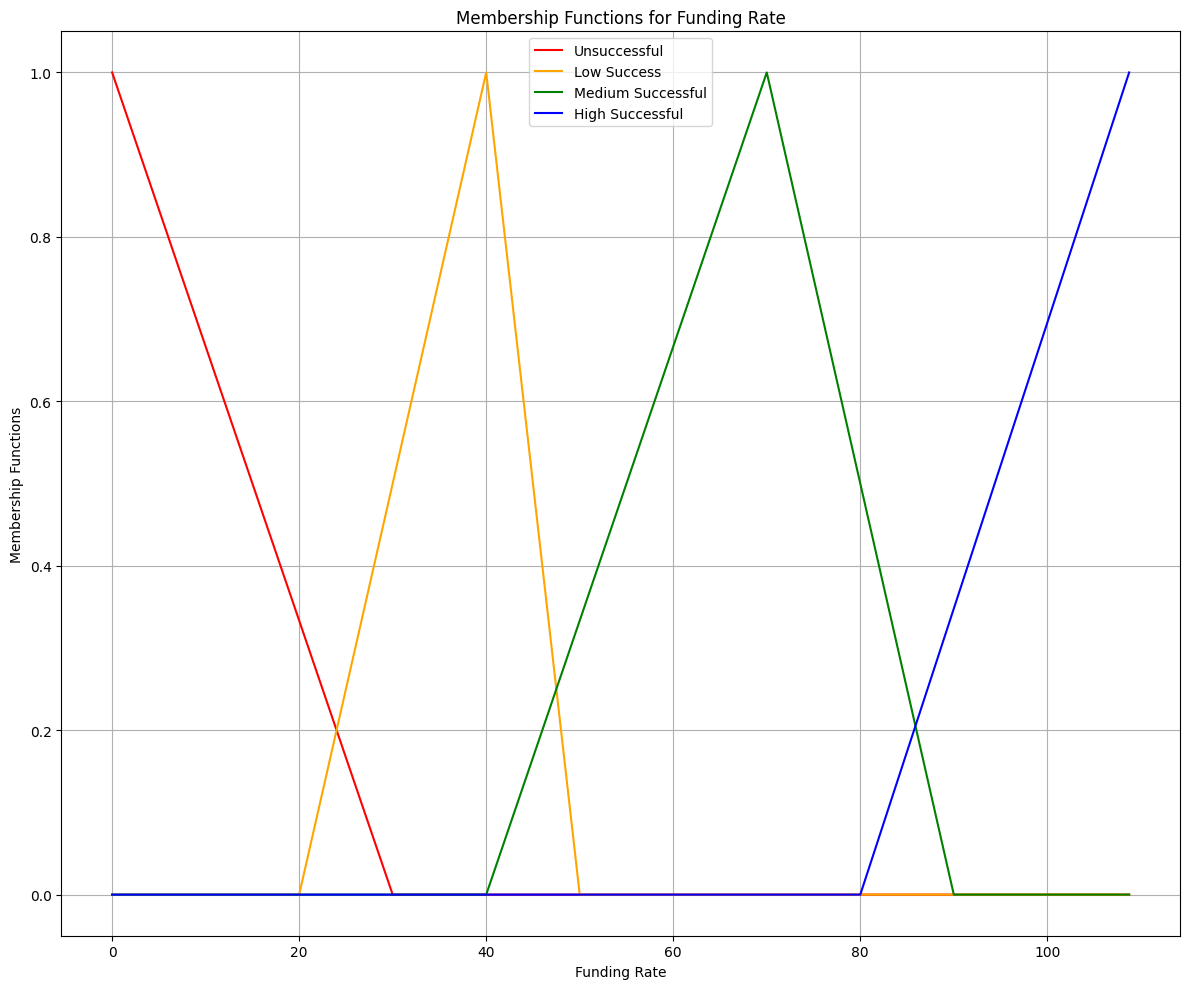

In [47]:
#x_destek = destek_oranı_np

import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt

# Destek Oranı evreni
x_destek = np.array(sorted_destek_oranı_np)
#x_destek = np.arange(0, 130, 1)

# Üyelik fonksiyonları
basarisiz = fuzz.trimf(x_destek, [0, 0, 30])
dusuk_basarili = fuzz.trimf(x_destek, [20, 40, 50])
orta_basarili = fuzz.trimf(x_destek, [40, 70, 90])
yuksek_basarili = fuzz.trimf(x_destek, [80, 108.75, 108.75])

basari['basarisiz'] = fuzz.trimf(basari.universe, [0, 0, 1])
basari['orta'] = fuzz.trimf(basari.universe, [0.5, 1, 1.5])
basari['basarili'] = fuzz.trimf(basari.universe, [1.5, 2, 2.5])
basari['cok_basarili'] = fuzz.trimf(basari.universe, [2.5, 3, 3])


# Grafik
plt.figure(figsize=(12, 10))
plt.plot(x_destek, basarisiz, 'r', label='Unsuccessful')
plt.plot(x_destek, dusuk_basarili, 'orange', label='Low Success')
plt.plot(x_destek, orta_basarili, 'g', label='Medium Successful')
plt.plot(x_destek, yuksek_basarili, 'b', label='High Successful')
plt.title('Membership Functions for Funding Rate')
plt.xlabel('Funding Rate')
plt.ylabel('Membership Functions')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [163]:
tahminler

[(108.75, 2.666665262159133),
 (100, 2.6666666666666665),
 (101, 2.6666666666666665)]

# Graph of Fuzzy model

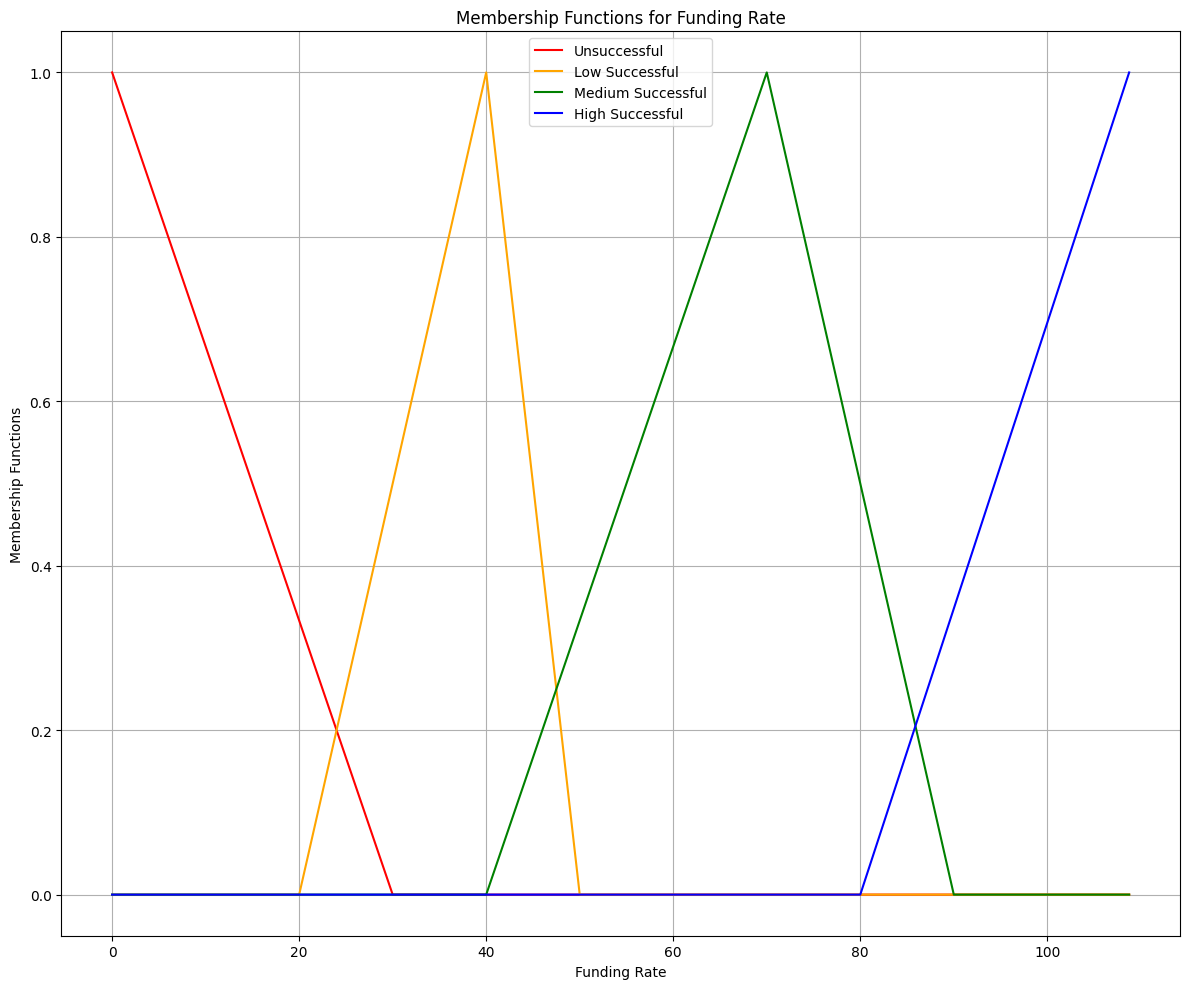

In [48]:
# Grafik
plt.figure(figsize=(12, 10))
plt.plot(sorted_destek_oranı_np, basarisiz, 'r', label='Unsuccessful')
plt.plot(sorted_destek_oranı_np, dusuk_basarili, 'orange', label='Low Successful')
plt.plot(sorted_destek_oranı_np, orta_basarili, 'g', label='Medium Successful')
plt.plot(sorted_destek_oranı_np, yuksek_basarili, 'b', label='High Successful')
plt.title('Membership Functions for Funding Rate')
plt.xlabel('Funding Rate')
plt.ylabel('Membership Functions')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [51]:
destek_orani.universe.max()

109

In [121]:
k = 0
for i in destek_oranı_np:
    k = k+1
    print(k)
    print(round(i))
    print("++++++++++++")

1
109
++++++++++++
2
100
++++++++++++
3
101
++++++++++++
4
101
++++++++++++
5
104
++++++++++++
6
109
++++++++++++
7
109
++++++++++++
8
101
++++++++++++
9
101
++++++++++++
10
100
++++++++++++
11
106
++++++++++++
12
109
++++++++++++
13
100
++++++++++++
14
104
++++++++++++
15
100
++++++++++++
16
104
++++++++++++
17
100
++++++++++++
18
0
++++++++++++
19
88
++++++++++++
20
81
++++++++++++
21
52
++++++++++++
22
39
++++++++++++
23
36
++++++++++++
24
29
++++++++++++
25
29
++++++++++++
26
27
++++++++++++
27
24
++++++++++++
28
21
++++++++++++
29
16
++++++++++++
30
15
++++++++++++
31
13
++++++++++++
32
13
++++++++++++
33
13
++++++++++++
34
12
++++++++++++
35
12
++++++++++++
36
11
++++++++++++
37
9
++++++++++++
38
8
++++++++++++
39
7
++++++++++++
40
6
++++++++++++
41
6
++++++++++++
42
5
++++++++++++
43
5
++++++++++++
44
5
++++++++++++
45
4
++++++++++++
46
3
++++++++++++
47
3
++++++++++++
48
2
++++++++++++
49
2
++++++++++++
50
2
++++++++++++
51
1
++++++++++++
52
1
++++++++++++
53
1
++++++++++++
54


In [119]:
destek_oranı_np.item(1627)

100.0

In [87]:
np.arange(0, 1268, 1)

array([   0,    1,    2, ..., 1265, 1266, 1267])

In [ ]:
# Giriş ve çıkış değişkenlerini tanımla
destek_orani = ctrl.Antecedent(np.arange(0, 111, 1), 'Destek_Orani')
basari = ctrl.Consequent(np.arange(0, 4, 1), 'Basari')

Destek_Orani_np = df_cleaned["Destek_Orani"].to_numpy()
destek_orani = ctrl.Antecedent(Destek_Orani_np, 'Destek_Orani')
#destek_orani = ctrl.Antecedent(np.arange(0, 201, 1), 'Destek_Orani')
basari = ctrl.Consequent(np.arange(0, 4, 1), 'Basari')  # 0: Başarısız, 1: Orta, 2: Başarılı, 3: Çok Başarılı

In [84]:
len(np.arange(0, 1268, 1))

1268

In [82]:
len(df_cleaned["Destek_Orani"].to_numpy())

1628

In [52]:
import numpy as np

oranlar = np.linspace(0, 200, 100)
sonuclar = []

for oran in oranlar:
    #basari_sim.input['Destek_Orani'] = oran
    #basari_sim.compute()
    #sonuclar.append(basari_sim.output['Basari'])
    basari_sim.input['Destek_Orani'] = oran
    basari_sim.compute()
    print(f"Destek Oranı: {oran} -> Tahmini Başarı Skoru (0-3): {basari_sim.output['Basari']:.2f}")
    print(basari_sim.defuzz_consequents())
'''
plt.figure(figsize=(10,5))
plt.plot(oranlar, sonuclar, label="Success Prediction")
plt.xlabel("Support Rate")
plt.ylabel("Support Score (0-3)")
plt.title("Support Rate vs Support Score")
plt.grid(True)
plt.legend()
plt.show()
'''

Destek Oranı: 0.0 -> Tahmini Başarı Skoru (0-3): 0.33
{'Basari': 0.3333333333333333}
Destek Oranı: 2.0202020202020203 -> Tahmini Başarı Skoru (0-3): 0.33
{'Basari': 0.3333333333333333}
Destek Oranı: 4.040404040404041 -> Tahmini Başarı Skoru (0-3): 0.37
{'Basari': 0.37120890605082546}
Destek Oranı: 6.0606060606060606 -> Tahmini Başarı Skoru (0-3): 0.33
{'Basari': 0.3333333333333333}
Destek Oranı: 8.080808080808081 -> Tahmini Başarı Skoru (0-3): 2.44
{'Basari': 2.4357980251327747}
Destek Oranı: 10.101010101010102 -> Tahmini Başarı Skoru (0-3): 0.33
{'Basari': 0.3344629408585359}
Destek Oranı: 12.121212121212121 -> Tahmini Başarı Skoru (0-3): 0.33
{'Basari': 0.3333333333333333}
Destek Oranı: 14.141414141414142 -> Tahmini Başarı Skoru (0-3): 0.33
{'Basari': 0.3339178387397093}
Destek Oranı: 16.161616161616163 -> Tahmini Başarı Skoru (0-3): 0.34
{'Basari': 0.33549505618471137}
Destek Oranı: 18.181818181818183 -> Tahmini Başarı Skoru (0-3): 0.33
{'Basari': 0.3333333333333333}
Destek Oranı: 2

'\nplt.figure(figsize=(10,5))\nplt.plot(oranlar, sonuclar, label="Success Prediction")\nplt.xlabel("Support Rate")\nplt.ylabel("Support Score (0-3)")\nplt.title("Support Rate vs Support Score")\nplt.grid(True)\nplt.legend()\nplt.show()\n'

In [56]:
destek_oranı_np_order

array([   0,    1,    2, ..., 1625, 1626, 1627])

C:\Users\Ugur Ejder\anaconda3\Lib\site-packages\skfuzzy\control\fuzzyvariable.py:125: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


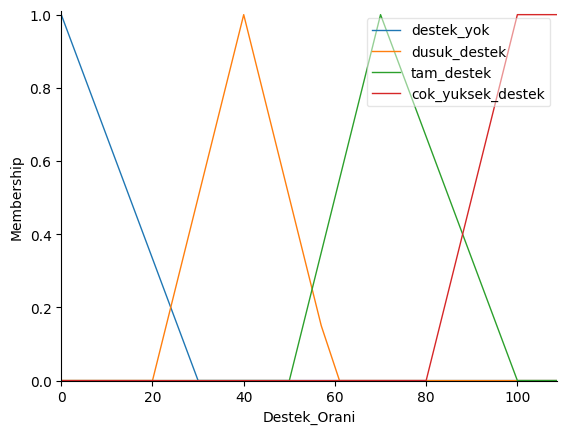

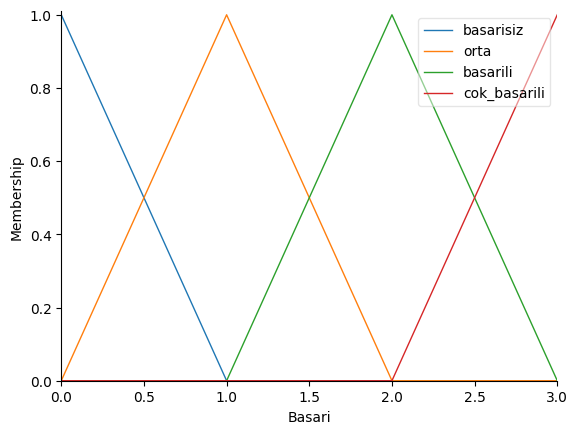

[(108.75, 2.6666666666666665), (100, 2.6666666666666665), (101, 2.6666666666666665)]


In [57]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

# Giriş ve çıkış değişkenlerini tanımla
destek_orani = ctrl.Antecedent(sorted_destek_oranı_np, 'Destek_Orani')
basari = ctrl.Consequent(np.arange(0, 4, 1), 'Basari')




# Üyelik fonksiyonları
destek_orani['destek_yok'] = fuzz.trimf(destek_orani.universe, [0, 0, 30])
destek_orani['dusuk_destek'] = fuzz.trimf(destek_orani.universe, [20, 40, 60])
destek_orani['tam_destek'] = fuzz.trimf(destek_orani.universe, [50, 70, 100])
destek_orani['cok_yuksek_destek'] = fuzz.trapmf(destek_orani.universe, [80, 100, 108.75, 108.75])

basari['basarisiz'] = fuzz.trimf(basari.universe, [0, 0, 1])
basari['orta'] = fuzz.trimf(basari.universe, [0.5, 1, 1.5])
basari['basarili'] = fuzz.trimf(basari.universe, [1.5, 2, 2.5])
basari['cok_basarili'] = fuzz.trimf(basari.universe, [2.5, 3, 3])

# Kurallar
rule1 = ctrl.Rule(destek_orani['destek_yok'], basari['basarisiz'])
rule2 = ctrl.Rule(destek_orani['dusuk_destek'], basari['orta'])
rule3 = ctrl.Rule(destek_orani['tam_destek'], basari['basarili'])
rule4 = ctrl.Rule(destek_orani['cok_yuksek_destek'], basari['cok_basarili'])

# Sistem tanımı
basari_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4])

# Görselleştirme
destek_orani.view()
basari.view()
plt.show()

# Örnek veri testi
ornek_veriler = [108.75, 100, 101]
tahminler = []

for deger in ornek_veriler:
    if destek_orani.universe.min() <= deger <= destek_orani.universe.max():
        sim = ctrl.ControlSystemSimulation(basari_ctrl)
        sim.input['Destek_Orani'] = deger
        sim.compute()
        tahminler.append((deger, sim.output['Basari']))
    else:
        tahminler.append((deger, 'Geçersiz değer'))

print(tahminler)


C:\Users\Ugur Ejder\anaconda3\Lib\site-packages\skfuzzy\control\fuzzyvariable.py:125: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


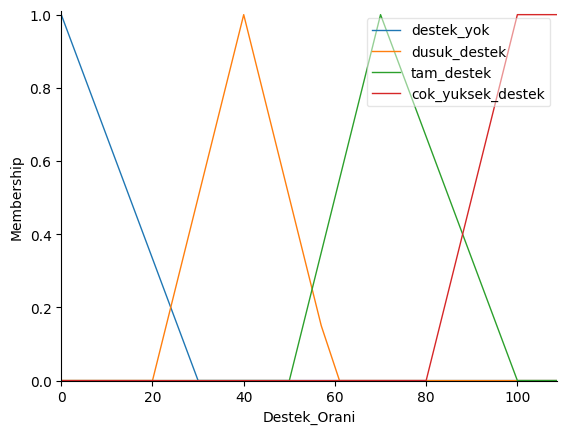

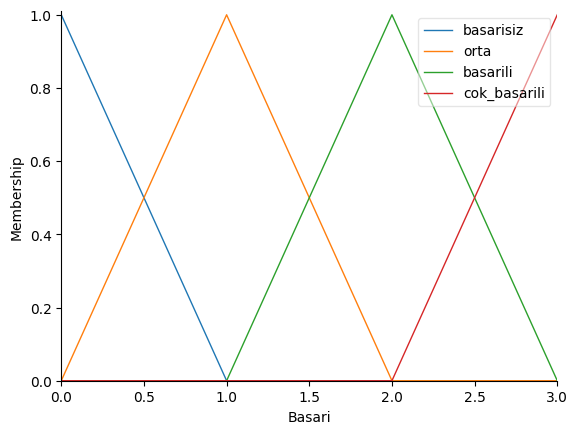

<Figure size 1600x1200 with 0 Axes>

[(108.75, 2.6666666666666665),
 (100, 2.6666666666666665),
 (101, 2.6666666666666665)]

In [58]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

# 1. Girdi ve çıktı tanımları
#Destek_Orani_np = df_cleaned["Destek_Orani"].to_numpy()
Destek_Orani_np = np.arange(0, 110, 1)
destek_orani = ctrl.Antecedent(sorted_destek_oranı_np, 'Destek_Orani')
#destek_orani = ctrl.Antecedent(np.arange(0, 201, 1), 'Destek_Orani')
basari = ctrl.Consequent(np.arange(0, 4, 1), 'Basari')  # 0: Başarısız, 1: Orta, 2: Başarılı, 3: Çok Başarılı

# 2. Üyelik fonksiyonları tanımı
'''
destek_orani['dusuk'] = fuzz.trimf(destek_orani.universe, [0, 0, 60])
destek_orani['orta'] = fuzz.trimf(destek_orani.universe, [40, 80, 120])
destek_orani['yuksek'] = fuzz.trimf(destek_orani.universe, [100, 140, 180])
destek_orani['cok_yuksek'] = fuzz.trapmf(destek_orani.universe, [160, 180, 200, 200])
'''

destek_orani['destek_yok'] = fuzz.trimf(destek_orani.universe, [0, 0, 30])
destek_orani['dusuk_destek'] = fuzz.trimf(destek_orani.universe, [20, 40, 60])
destek_orani['tam_destek'] = fuzz.trimf(destek_orani.universe, [50, 70, 100])
destek_orani['cok_yuksek_destek'] = fuzz.trapmf(destek_orani.universe, [80, 100, 108.75, 200])



basari['basarisiz'] = fuzz.trimf(basari.universe, [0, 0, 1])
basari['orta'] = fuzz.trimf(basari.universe, [0.5, 1, 1.5])
basari['basarili'] = fuzz.trimf(basari.universe, [1.5, 2, 2.5])
basari['cok_basarili'] = fuzz.trimf(basari.universe, [2.5, 3, 3])

# 3. Kurallar
rule1 = ctrl.Rule(destek_orani['destek_yok'], basari['basarisiz'])
rule2 = ctrl.Rule(destek_orani['dusuk_destek'], basari['orta'])
rule3 = ctrl.Rule(destek_orani['tam_destek'], basari['basarili'])
rule4 = ctrl.Rule(destek_orani['cok_yuksek_destek'], basari['cok_basarili'])

# 4. Sistem oluşturma
basari_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4])
basari_sim = ctrl.ControlSystemSimulation(basari_ctrl)

destek_orani.view()
basari.view()
plt.figure(figsize=(16, 12))
plt.show()

# 5. Örnek veri çalıştırma (136, 100, 101 için)
ornek_veriler = [108.75, 100, 101]
tahminler = []

for deger in ornek_veriler:
    sim = ctrl.ControlSystemSimulation(basari_ctrl)
    basari_sim.input['Destek_Orani'] = deger
    basari_sim.compute()
    tahminler.append((deger, basari_sim.output['Basari']))

tahminler




In [155]:
basari_sim.print_state

<bound method ControlSystemSimulation.print_state of <skfuzzy.control.controlsystem.ControlSystemSimulation object at 0x000001B043DEFDD0>>

In [91]:
basari_sim.input['Destek_Orani'] = deger
basari_sim.compute()
tahminler.append((deger, basari_sim.output['Basari']))

KeyError: 'Basari'

In [86]:
Destek_Orani_np

array([108.75, 100.  , 101.  , ..., 100.  , 100.  , 100.  ])

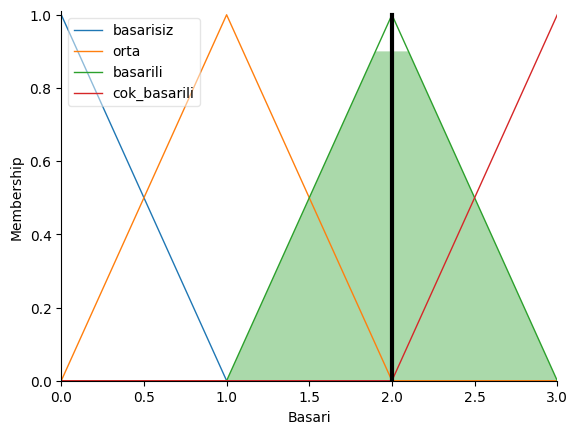

In [72]:
basari_sim.input['Destek_Orani'] = 136
basari_sim.compute()

# Çıktının grafiksel olarak gösterimi
basari.view(sim=basari_sim)
plt.show()

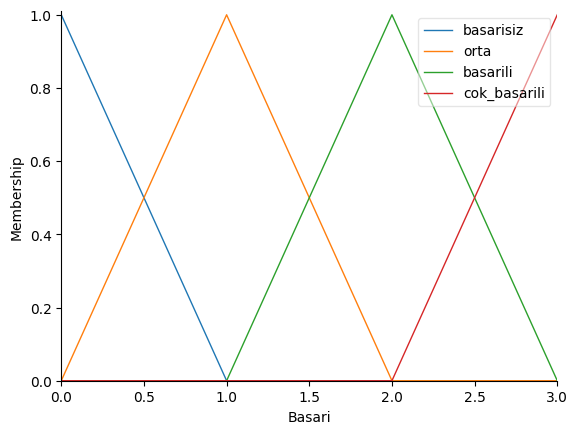

In [45]:
# Örnek bir destek oranı için
basari_sim.input['Destek_Orani'] = 136
basari_sim.compute()

# Çıktının grafiksel olarak gösterimi
basari.view(sim=basari_sim)
plt.show()


In [60]:
df_cleaned

,id,platform_adi,kitle_fonlamasi_turu,kategori,fon_sekli,proje_adi,proje_sahibi,proje_sahibi_cinsiyet,kac_proje_destekledi,kac_projeye_abone,...,etiket_sayisi,icerik_kelime_sayisi,proje_aciklamasi,hedef_miktari,toplanan_tutar,destek_orani_yuzde,basari_durumu,Destek_Orani,Basari,destek_oranı_list
0,1,fongogo,ödül,diğer,ya hep ya hiç,Gerçek Gizlidir Filmleri,Lob Ekibi,belirsiz,1,0,...,0,301,Türkiye’de ilk kez her aşaması ‘online’ olarak...,40000,54410,1.36,başarılı,108.75,1,0
1,2,fongogo,ödül,diğer,ya hep ya hiç,Fongogo - Hayat Bulsun!,Fongogo Team,belirsiz,3,0,...,0,167,"Fongogo ekibi olarak büyümek, daha geniş kitle...",50000,50110,1.00,başarılı,100.00,1,1
2,3,fongogo,ödül,diğer,ya hep ya hiç,"PAYLAŞIMIN, SEVGİNİN VE ÇOCUKLARIN İYİLİK EVİ ...",SİNEM CAN,kadın,0,0,...,4,413,Çocuklara her şeyin ücretsiz olduğu iyilik evi...,47000,47850,1.01,başarılı,101.00,1,2
3,4,fongogo,ödül,diğer,ya hep ya hiç,Türk Kadının 100.yıl Seyri,Deniz Tutkusu Seyirde,kadın,0,0,...,5,287,‘Sözde değil Özde İzindeyiz ‘ sloganıyla Atatü...,35000,35450,1.01,başarılı,101.00,1,3
4,5,fongogo,ödül,diğer,ya hep ya hiç,Doğadaki Çocuk,Seren Kutadgu,kadın,2,0,...,3,571,İstanbul'daki çocuk yuvalarında yaşayan dezava...,30000,31250,1.04,başarılı,104.00,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1623,1624,buluşum,ödül,eğitim,ya hep ya hiç,SoruSana: Fırsat Eşitliğini Destekleyen Uygulama!,Cenk Sezgin,erkek,0,0,...,0,221,Üniversiteye Hazırlıkta Paylaşımcı Model: Soru...,50000,50000,1.00,başarılı,100.00,1,1623
1624,1625,buluşum,ödül,kültür-sanat,ya hep ya hiç,Sürdürülebilir Yaşam Film Festivali,belirsiz,belirsiz,0,0,...,0,157,"Festival, gerçek hikayelerle ilham vererek, dü...",15000,15000,1.00,başarılı,100.00,1,1624
1625,1626,buluşum,ödül,sosyal sorumluluk,ya hep ya hiç,Yazar Kasa ve POS'larda YUVARLA,Emre Danacı,erkek,0,0,...,0,159,Sivil toplum kuruluşlarının gelirlerini arttır...,10000,10000,1.00,başarılı,100.00,1,1625
1626,1627,buluşum,ödül,eğitim,ya hep ya hiç,Gelecek Daha Net - Geleceğini Tasarla Modülü,Serra Titiz,kadın,0,0,...,0,287,"Geleceğini Tasarla Modülü, siteye kayıt olan g...",25000,25000,1.00,başarılı,100.00,1,1626


In [8]:
xl = pd.ExcelFile("df_cleaned_with_fuzzy_new.xlsx")
df_cleaned_with_fuzzy = xl.parse('df_cleaned')

In [9]:
df_cleaned_with_fuzzy.columns


Index(['Unnamed: 0', 'id', 'platform_adi', 'kitle_fonlamasi_turu', 'kategori',
       'fon_sekli', 'proje_adi', 'proje_sahibi', 'proje_sahibi_cinsiyet',
       'kac_proje_destekledi', 'kac_projeye_abone', 'kac_projenin_sahibi',
       'kac_proje_takiminda', 'konum', 'bolge', 'yil', 'proje_baslama_tarihi',
       'proje_bitis_tarihi', 'gun_sayisi', 'tanitim_videosu', 'video_uzunlugu',
       'gorsel_sayisi', 'sss', 'guncellemeler', 'yorumlar', 'destekci_sayisi',
       'odul_sayisi', 'ekip_kisi_sayisi', 'web_sitesi', 'sosyal_medya',
       'sm_sayisi', 'sm_takipci', 'etiket_sayisi', 'icerik_kelime_sayisi',
       'proje_aciklamasi', 'hedef_miktari', 'toplanan_tutar',
       'destek_orani_yuzde', 'basari_durumu', 'Destek_Orani', 'Basari',
       'destek_oranı_list', ' Sınıf Etiketi', 'Etiket_sayisal_deger'],
      dtype='object')

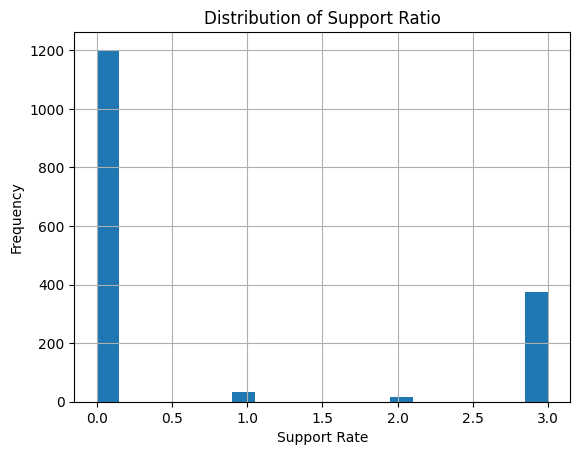

In [10]:
import pandas as pd
import matplotlib.pyplot as plt


df_cleaned_with_fuzzy["Etiket_sayisal_deger"].hist(bins=20)
plt.title("Distribution of Support Ratio")
plt.xlabel("Support Rate")
plt.ylabel("Frequency")
plt.show()


C:\Users\Ugur Ejder\AppData\Local\Temp\ipykernel_14356\2548592601.py:11: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab20', len(counts))


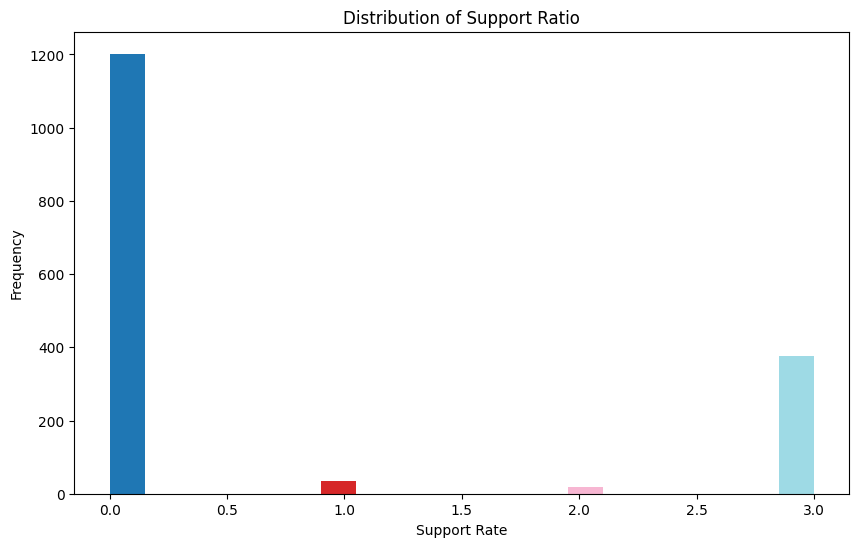

In [69]:
import matplotlib.pyplot as plt
import numpy as np

# Histogram verilerini al
counts, bins = np.histogram(df_cleaned_with_fuzzy["Etiket_sayisal_deger"], bins=20)

# Bar merkezlerini hesapla
bin_centers = 0.5 * (bins[1:] + bins[:-1])

# Renk paleti (20 farklı renk)
colors = plt.cm.get_cmap('tab20', len(counts))

# Grafik çizimi
plt.figure(figsize=(10, 6))
for i in range(len(counts)):
    plt.bar(bin_centers[i], counts[i], width=(bins[1] - bins[0]), color=colors(i))

plt.title("Distribution of Support Ratio")
plt.xlabel("Support Rate")
plt.ylabel("Frequency")
plt.show()


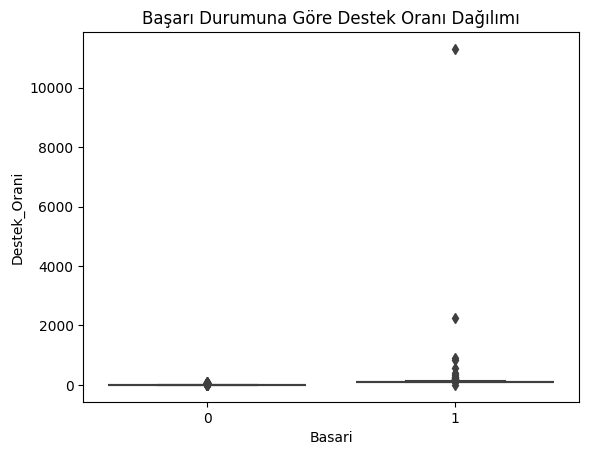

In [121]:
import seaborn as sns

sns.boxplot(x="Basari", y="Destek_Orani", data=df)
plt.title("Başarı Durumuna Göre Destek Oranı Dağılımı")
plt.show()

# Practise of fuzzy workshop

In [186]:
def fuzzy_logic(temperature, humidity):

    #Inference

    def temp_low(x):
        if x <= 25: return 1
        elif x > 25 and x < 50: return (50 - x)/25
        else : return 0
    
    def temp_med(x):
        if x <= 25 or x >= 75: return 0
        elif x > 25 and x <= 50: return (x - 25)/25
        elif x > 50 and x < 75: return (75 - x)/25
    
    def temp_high(x):
        if x <= 50: return 0
        elif x > 50 and x < 75: return (x - 50)/25
        else : return 1

    def humid_low(x):
        if x <= 25: return 1
        elif x > 25 and x < 50: return (50 - x)/25
        else : return 0
    
    def humid_med(x):
        if x <= 25 or x >= 75: return 0
        elif x > 25 and x <= 50: return (50 - x)/25
        elif x > 50 and x < 75: return (75 - x)/25
    
    def humid_high(x):
        if x <= 50: return 0
        elif x > 50 and x < 75: return (x - 50)/25
        else : return 1
    
    #DeFuzzyfication

    def fan_speed_low():
        return (temp_low(temperature) + humid_low(humidity))/2
        
    
    def fan_speed_med():
        return (temp_med(temperature) + humid_med(humidity))/2
    
    def fan_speed_high():
        return (temp_high(temperature) + humid_high(humidity))/2
    
    return [fan_speed_low(), fan_speed_med(), fan_speed_high()]

if __name__ == '__main__':
    temps = [23, 45, 56, 78]
    humids = [56, 45, 78, 78]
    for t, h in zip(temps, humids):
        result = fuzzy_logic(t, h)
        print(f'For Temperature : {t} and Humidity : {h}')
        print(f'Fan Speed --> Low : {result[0]}, Medium : {result[1]}, High : {result[-1]}')

For Temperature : 23 and Humidity : 56
Fan Speed --> Low : 0.5, Medium : 0.38, High : 0.12
For Temperature : 45 and Humidity : 45
Fan Speed --> Low : 0.2, Medium : 0.5, High : 0.0
For Temperature : 56 and Humidity : 78
Fan Speed --> Low : 0.0, Medium : 0.38, High : 0.62
For Temperature : 78 and Humidity : 78
Fan Speed --> Low : 0.0, Medium : 0.0, High : 1.0


# Machine Learning Phase of the study

In [70]:
df_cleaned_with_fuzzy

,Unnamed: 0,id,platform_adi,kitle_fonlamasi_turu,kategori,fon_sekli,proje_adi,proje_sahibi,proje_sahibi_cinsiyet,kac_proje_destekledi,...,proje_aciklamasi,hedef_miktari,toplanan_tutar,destek_orani_yuzde,basari_durumu,Destek_Orani,Basari,destek_oranı_list,Sınıf Etiketi,Etiket_sayisal_deger
0,0,1,fongogo,ödül,diğer,ya hep ya hiç,Gerçek Gizlidir Filmleri,Lob Ekibi,belirsiz,1,...,Türkiye’de ilk kez her aşaması ‘online’ olarak...,40000,54410,1.36,başarılı,108.75,1,0,cok_basarili,3
1,1,2,fongogo,ödül,diğer,ya hep ya hiç,Fongogo - Hayat Bulsun!,Fongogo Team,belirsiz,3,...,"Fongogo ekibi olarak büyümek, daha geniş kitle...",50000,50110,1.00,başarılı,100.00,1,1,cok_basarili,3
2,2,3,fongogo,ödül,diğer,ya hep ya hiç,"PAYLAŞIMIN, SEVGİNİN VE ÇOCUKLARIN İYİLİK EVİ ...",SİNEM CAN,kadın,0,...,Çocuklara her şeyin ücretsiz olduğu iyilik evi...,47000,47850,1.01,başarılı,101.00,1,2,cok_basarili,3
3,3,4,fongogo,ödül,diğer,ya hep ya hiç,Türk Kadının 100.yıl Seyri,Deniz Tutkusu Seyirde,kadın,0,...,‘Sözde değil Özde İzindeyiz ‘ sloganıyla Atatü...,35000,35450,1.01,başarılı,101.00,1,3,cok_basarili,3
4,4,5,fongogo,ödül,diğer,ya hep ya hiç,Doğadaki Çocuk,Seren Kutadgu,kadın,2,...,İstanbul'daki çocuk yuvalarında yaşayan dezava...,30000,31250,1.04,başarılı,104.00,1,4,cok_basarili,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1623,1623,1624,buluşum,ödül,eğitim,ya hep ya hiç,SoruSana: Fırsat Eşitliğini Destekleyen Uygulama!,Cenk Sezgin,erkek,0,...,Üniversiteye Hazırlıkta Paylaşımcı Model: Soru...,50000,50000,1.00,başarılı,100.00,1,1623,cok_basarili,3
1624,1624,1625,buluşum,ödül,kültür-sanat,ya hep ya hiç,Sürdürülebilir Yaşam Film Festivali,belirsiz,belirsiz,0,...,"Festival, gerçek hikayelerle ilham vererek, dü...",15000,15000,1.00,başarılı,100.00,1,1624,cok_basarili,3
1625,1625,1626,buluşum,ödül,sosyal sorumluluk,ya hep ya hiç,Yazar Kasa ve POS'larda YUVARLA,Emre Danacı,erkek,0,...,Sivil toplum kuruluşlarının gelirlerini arttır...,10000,10000,1.00,başarılı,100.00,1,1625,cok_basarili,3
1626,1626,1627,buluşum,ödül,eğitim,ya hep ya hiç,Gelecek Daha Net - Geleceğini Tasarla Modülü,Serra Titiz,kadın,0,...,"Geleceğini Tasarla Modülü, siteye kayıt olan g...",25000,25000,1.00,başarılı,100.00,1,1626,cok_basarili,3


In [71]:
os.getcwd()

'C:\\Users\\Ugur Ejder\\Desktop\\crowdfunding'

In [2]:
# Gerekli kütüphaneleri tekrar yükleyip Excel dosyasını tekrar okuyalım
import pandas as pd

# Excel dosyasını yeniden yükleyelim
file_path = "df_cleaned_with_fuzzy_new_machine_learning_set.xlsx"
df_ml = pd.read_excel(file_path)

# İlk birkaç satırı ve sütun isimlerini gösterelim
df_ml.head()


,id,platform_adi,kitle_fonlamasi_turu,kategori,fon_sekli,proje_adi,proje_sahibi,proje_sahibi_cinsiyet,kac_proje_destekledi,kac_projeye_abone,...,web_sitesi,sosyal_medya,sm_sayisi,sm_takipci,etiket_sayisi,icerik_kelime_sayisi,proje_aciklamasi,hedef_miktari,toplanan_tutar,Etiket_sayisal_deger
0,1,fongogo,ödül,diğer,ya hep ya hiç,Gerçek Gizlidir Filmleri,Lob Ekibi,belirsiz,1,0,...,yok,var,3,274,0,301,Türkiye’de ilk kez her aşaması ‘online’ olarak...,40000,54410,3
1,2,fongogo,ödül,diğer,ya hep ya hiç,Fongogo - Hayat Bulsun!,Fongogo Team,belirsiz,3,0,...,yok,var,3,5634,0,167,"Fongogo ekibi olarak büyümek, daha geniş kitle...",50000,50110,3
2,3,fongogo,ödül,diğer,ya hep ya hiç,"PAYLAŞIMIN, SEVGİNİN VE ÇOCUKLARIN İYİLİK EVİ ...",SİNEM CAN,kadın,0,0,...,var,var,2,510,4,413,Çocuklara her şeyin ücretsiz olduğu iyilik evi...,47000,47850,3
3,4,fongogo,ödül,diğer,ya hep ya hiç,Türk Kadının 100.yıl Seyri,Deniz Tutkusu Seyirde,kadın,0,0,...,var,var,2,3338,5,287,‘Sözde değil Özde İzindeyiz ‘ sloganıyla Atatü...,35000,35450,3
4,5,fongogo,ödül,diğer,ya hep ya hiç,Doğadaki Çocuk,Seren Kutadgu,kadın,2,0,...,yok,var,1,144,3,571,İstanbul'daki çocuk yuvalarında yaşayan dezava...,30000,31250,3


# gereksiz kolonlar çıkarılıyor

In [7]:
df_ml_cleaned =  df_ml
df_ml_cleaned.drop(['proje_adi', 'proje_sahibi','kac_projenin_sahibi','proje_baslama_tarihi','proje_bitis_tarihi','proje_aciklamasi','hedef_miktari'], axis=1, inplace=True) 

In [8]:
df_ml_cleaned.columns

Index(['id', 'platform_adi', 'kitle_fonlamasi_turu', 'kategori', 'fon_sekli',
       'proje_sahibi_cinsiyet', 'kac_proje_destekledi', 'kac_projeye_abone',
       'kac_proje_takiminda', 'konum', 'bolge', 'yil', 'gun_sayisi',
       'tanitim_videosu', 'video_uzunlugu', 'gorsel_sayisi', 'sss',
       'guncellemeler', 'yorumlar', 'destekci_sayisi', 'odul_sayisi',
       'ekip_kisi_sayisi', 'web_sitesi', 'sosyal_medya', 'sm_sayisi',
       'sm_takipci', 'etiket_sayisi', 'icerik_kelime_sayisi', 'toplanan_tutar',
       'Etiket_sayisal_deger'],
      dtype='object')

In [10]:
df_ml_cleaned.to_excel("df_ml_cleaned.xlsx")

In [82]:
!pip install imbalanced-learn scikit-learn pandas openpyxl

In [84]:
!pip install scikit-learn==1.3.2 imbalanced-learn==0.11.0

   ---------------------------------------- 0.0/9.2 MB ? eta -:--:--
   - -------------------------------------- 0.3/9.2 MB ? eta -:--:--
   ---------- ----------------------------- 2.4/9.2 MB 8.9 MB/s eta 0:00:01
   ------------- -------------------------- 3.1/9.2 MB 6.6 MB/s eta 0:00:01
   --------------------------- ------------ 6.3/9.2 MB 9.2 MB/s eta 0:00:01
   ------------------------------------- -- 8.7/9.2 MB 9.6 MB/s eta 0:00:01
   ---------------------------------------- 9.2/9.2 MB 9.4 MB/s eta 0:00:00

  Attempting uninstall: scikit-learn

    Found existing installation: scikit-learn 1.3.0

   ---------------------------------------- 0/2 [scikit-learn]
   ---------------------------------------- 0/2 [scikit-learn]
   ---------------------------------------- 0/2 [scikit-learn]
   ---------------------------------------- 0/2 [scikit-learn]
   ---------------------------------------- 0/2 [scikit-learn]
   ---------------------------------------- 0/2 [scikit-learn]
    Uninstal

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE

# SMOTE ile tahminleme yapılıyor. 

In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE

# Excel dosyasını oku
file_path = "df_cleaned_with_fuzzy_new_machine_learning_set.xlsx"
df_ml = pd.read_excel(file_path)


# Hedef ve özelliklerin ayrılması
target_column = 'Etiket_sayisal_deger'
X = df_ml.drop(columns=[target_column])
y = df_ml[target_column]

# Gereksiz metin sütunlarını çıkar
X = X.select_dtypes(include=['number', 'object']).copy()
X = X.drop(columns=['proje_adi', 'proje_aciklamasi'], errors='ignore')

# Kategorik verileri sayısala dönüştür
for col in X.select_dtypes(include='object').columns:
    X[col] = LabelEncoder().fit_transform(X[col].astype(str))

# Veriyi eğitim ve test olarak ayır
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# SMOTE ile sınıfları dengele
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Modeli eğit
model = RandomForestClassifier(random_state=42)
model.fit(X_resampled, y_resampled)

# Test verisi ile tahmin yap ve başarıyı ölç
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.98      0.97      0.98       234
           1       0.00      0.00      0.00         5
           2       1.00      0.25      0.40         4
           3       0.89      1.00      0.94        83

    accuracy                           0.95       326
   macro avg       0.72      0.56      0.58       326
weighted avg       0.94      0.95      0.95       326



C:\Users\Ugur Ejder\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Ugur Ejder\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Ugur Ejder\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.97      0.96      0.96       234
           1       0.00      0.00      0.00         5
           2       0.00      0.00      0.00         4
           3       0.85      0.94      0.89        83

    accuracy                           0.93       326
   macro avg       0.45      0.47      0.46       326
weighted avg       0.91      0.93      0.92       326



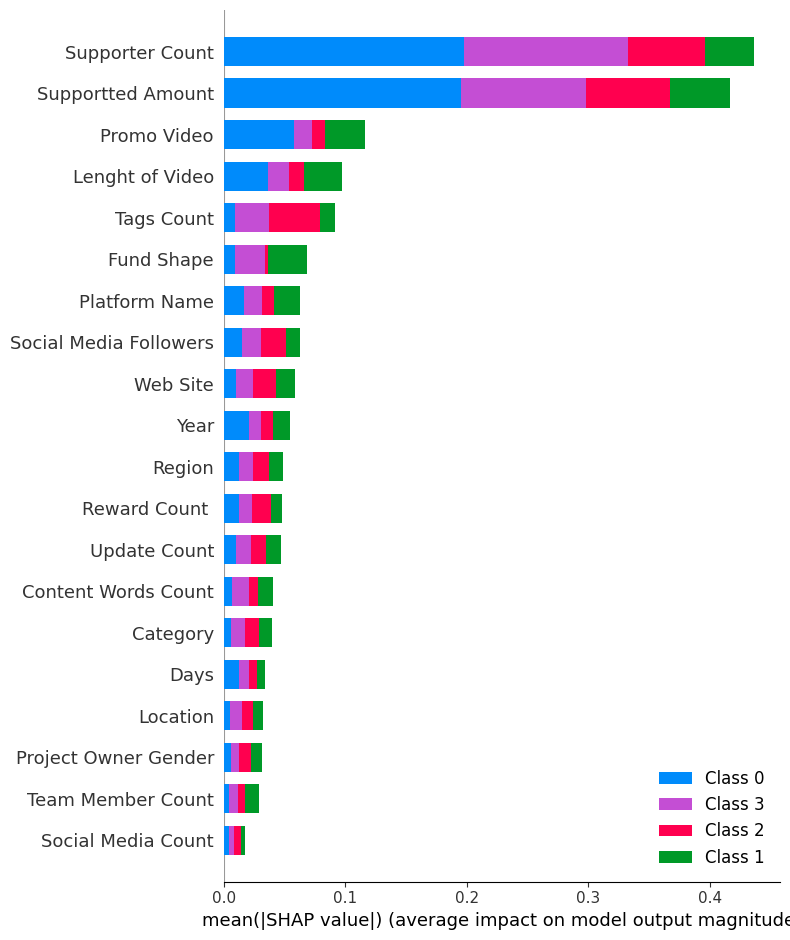

<Figure size 640x480 with 0 Axes>

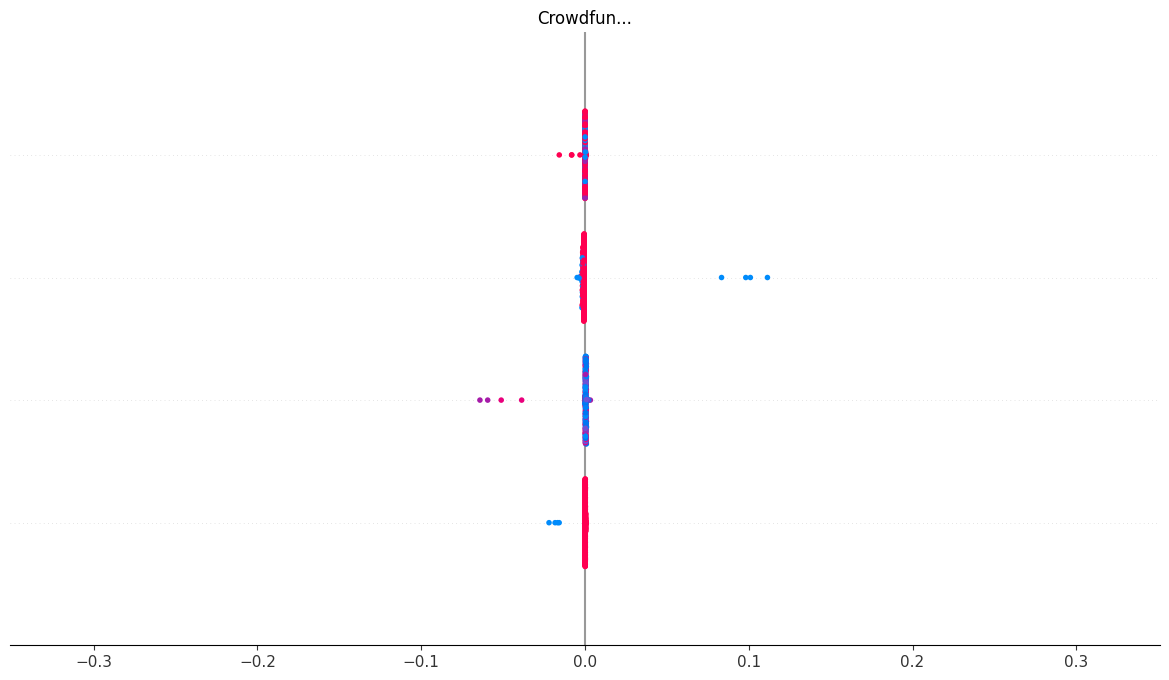

In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
import shap
import matplotlib.pyplot as plt

# 1. Excel dosyasını oku
df = pd.read_excel("df_cleaned_with_fuzzy_new_machine_learning_set_english.xlsx")

# 2. Hedef ve girdi ayrımı
target_column = 'Labelled Class'
X = df.drop(columns=[target_column])
y = df[target_column]

# 3. Metin sütunlarını çıkar
X = X.select_dtypes(include=['number', 'object']).copy()
#X = X.drop(columns=['proje_adi', 'proje_aciklamasi'], errors='ignore')
X = X.drop(columns=['Project Subscribed'], errors='ignore')

# 4. Kategorik sütunları label encode et
for col in X.select_dtypes(include='object').columns:
    X[col] = LabelEncoder().fit_transform(X[col].astype(str))

# 5. Train/test ayır
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 6. SMOTE ile dengele
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# 7. Modeli eğit
model = RandomForestClassifier(random_state=42)
model.fit(X_resampled, y_resampled)

# 8. Performans
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

# 9. SHAP açıklamaları
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

# 10. Önemli özellikleri göster
shap.summary_plot(shap_values, X_test, plot_type="bar")

# 11. Dağılım grafiği (detaylı)
shap.summary_plot(shap_values, X_test)


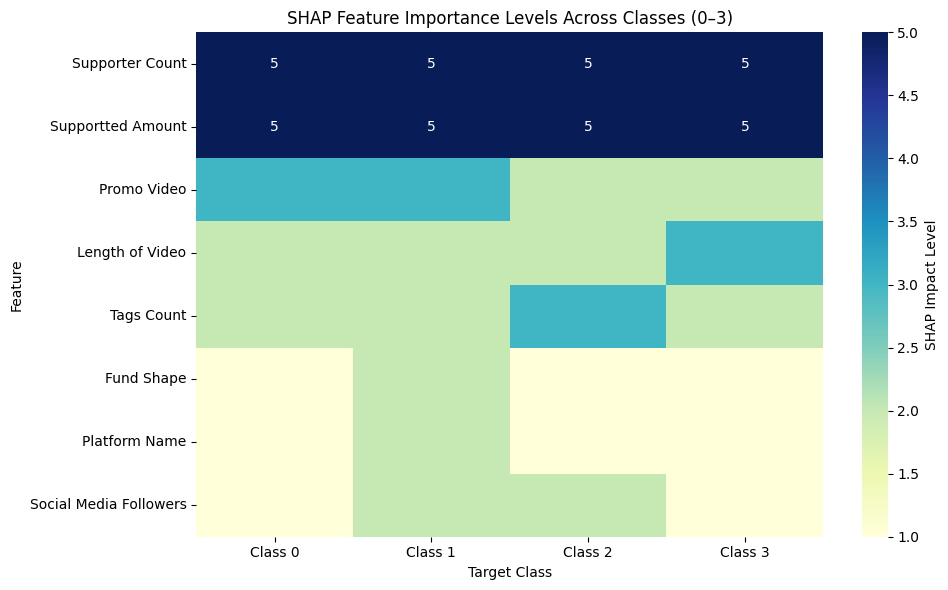

In [70]:
# Re-run after environment reset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Re-create the data
data = {
    "Class 0": [5, 5, 3, 2, 2, 1, 1, 1],
    "Class 1": [5, 5, 3, 2, 2, 2, 2, 2],
    "Class 2": [5, 5, 2, 2, 3, 1, 1, 2],
    "Class 3": [5, 5, 2, 3, 2, 1, 1, 1]
}
features = [
    "Supporter Count",
    "Supportted Amount",
    "Promo Video",
    "Length of Video",
    "Tags Count",
    "Fund Shape",
    "Platform Name",
    "Social Media Followers"
]

df_heatmap = pd.DataFrame(data, index=features)

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df_heatmap, annot=True, cmap="YlGnBu", cbar_kws={'label': 'SHAP Impact Level'}, fmt='d')
plt.title("SHAP Feature Importance Levels Across Classes (0–3)")
plt.xlabel("Target Class")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


In [26]:
 shap_values.shape

(326, 28, 4)

In [29]:
type(X_test)

pandas.core.frame.DataFrame

In [30]:
print(X_test.columns.tolist())

['Platform Name', 'Crowdfunding Type', 'Category', 'Fund Shape', 'Project Owner Gender', 'Project Supported Count', 'Project Owner Count', 'Project Team Count', 'Location', 'Region', 'Year', 'Days', 'Promo Video', 'Lenght of Video', 'Images Count', 'FAQs', 'Update Count', 'Comment Count', 'Supporter Count', 'Reward Count ', 'Team Member Count', 'Web Site', 'Social Media', 'Social Media Count', 'Social Media Followers', 'Tags Count', 'Content Words Count', 'Supportted Amount']


In [32]:
X_test.shape

(326, 28)

In [46]:
feature

'Supporter Count'

In [49]:
X_test = pd.DataFrame(X_test, columns=X.columns)

In [50]:
print(type(X_test))

<class 'pandas.core.frame.DataFrame'>


In [51]:
explainer = shap.TreeExplainer(model)
shap_values_all = explainer.shap_values(X_test)

# Check shape for class 0
print("SHAP values shape (class 0):", shap_values_all[0].shape)
print("X_test shape:", X_test.shape)

SHAP values shape (class 0): (28, 4)
X_test shape: (326, 28)


In [55]:
explainer = shap.TreeExplainer(model, feature_perturbation="tree_path_dependent")

# Recalculate SHAP values
shap_values_all = explainer.shap_values(X_test)

# Confirm shape
print("SHAP values shape (class 0):", shap_values_all[0].shape)

SHAP values shape (class 0): (28, 4)


In [65]:

shap_values_all[0][0]


array([ 0.01354358, -0.03605555, -0.00954209,  0.03205405])

# klasik ml ile tahminleme yapılıyor

In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
import shap
import matplotlib.pyplot as plt

# 1. Excel dosyasını oku
df = pd.read_excel("df_cleaned_with_fuzzy_new_machine_learning_set.xlsx")

# 2. Hedef ve girdi ayrımı
target_column = 'Etiket_sayisal_deger'
X = df.drop(columns=[target_column])
y = df[target_column]

# 3. Metin sütunlarını çıkar
X = X.select_dtypes(include=['number', 'object']).copy()
X = X.drop(columns=['proje_adi', 'proje_aciklamasi'], errors='ignore')

# 4. Kategorik sütunları label encode et
for col in X.select_dtypes(include='object').columns:
    X[col] = LabelEncoder().fit_transform(X[col].astype(str))

# 5. Train/test ayır
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 6. SMOTE ile dengele
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# 7. Modeli eğit
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# 8. Performans
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.97      0.98      0.97       234
           1       0.00      0.00      0.00         5
           2       0.00      0.00      0.00         4
           3       0.90      0.98      0.94        83

    accuracy                           0.95       326
   macro avg       0.47      0.49      0.48       326
weighted avg       0.93      0.95      0.94       326



C:\Users\Ugur Ejder\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Ugur Ejder\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Ugur Ejder\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [21]:
!pip install ace_tools

# Comparassion of machine learning models based on fuzzy logic using imbalance dataset

In [2]:
# Kernel sıfırlandığı için gerekli tüm kütüphaneler tekrar yükleniyor ve model karşılaştırması yeniden yapılacak
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

# Excel dosyasını yeniden oku
file_path = "df_ml_cleaned.xlsx"
df_ml_cleaned = pd.read_excel(file_path)

# Hedef sütun ve girdiler
target_column = "Etiket_sayisal_deger"
X = df_ml_cleaned.drop(columns=[target_column, 'Unnamed: 0', 'id'], errors='ignore').copy()
y = df_ml_cleaned[target_column]

# Kategorik sütunları sayısallaştır
for col in X.select_dtypes(include='object').columns:
    X[col] = LabelEncoder().fit_transform(X[col].astype(str))

# Eğitim/test bölme
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modeller tanımlanıyor
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "KNN": KNeighborsClassifier(),
    "MLP": MLPClassifier(random_state=42, max_iter=500)
}

# Performansları tutacağımız liste
baseline_results_full = []

# Her bir modeli eğit ve metrikleri hesapla
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='macro')
    rec = recall_score(y_test, y_pred, average='macro')
    prec = precision_score(y_test, y_pred, average='macro')
    baseline_results_full.append({
        "Model": name,
        "Accuracy": acc,
        "F1_score_macro": f1,
        "Recall": rec,
        "Precision": prec
    })

# Sonuçları tabloya dök
baseline_df_full = pd.DataFrame(baseline_results_full)
baseline_df_full

C:\Users\Ugur Ejder\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Ugur Ejder\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Ugur Ejder\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Ugur Ejder\anaconda3\Lib\site-packages\sklearn\metrics\_classification

,Model,Accuracy,F1_score_macro,Recall,Precision
0,Random Forest,0.932515,0.465358,0.472505,0.458430
1,Gradient Boosting,0.911043,0.450861,0.457252,0.444658
2,KNN,0.877301,0.425543,0.428007,0.423501
3,MLP,0.871166,0.423528,0.420039,0.429677


# 1- Feature seletion with Chi-Square testi 

In [3]:
from sklearn.feature_selection import SelectKBest, chi2

# Chi-Square testi sadece pozitif değerler ile çalışır, bu nedenle negatif olmayan X verisini kullanalım
X_chi2 = X.copy()
X_chi2 = X_chi2 - X_chi2.min()  # Tüm değerleri pozitif hale getir

# En iyi 10 özelliği seçelim (varsayılan olarak)
chi2_selector = SelectKBest(score_func=chi2, k=10)
X_chi2_selected = chi2_selector.fit_transform(X_chi2, y)

# Seçilen özellik isimlerini alalım
selected_chi2_features = X.columns[chi2_selector.get_support()].tolist()
selected_chi2_features


['kac_proje_destekledi',
 'video_uzunlugu',
 'gorsel_sayisi',
 'guncellemeler',
 'yorumlar',
 'destekci_sayisi',
 'ekip_kisi_sayisi',
 'sm_takipci',
 'icerik_kelime_sayisi',
 'toplanan_tutar']

In [6]:
# Chi-Square ile seçilen özelliklerle veri setini hazırla
X_chi2_selected_df = X[selected_chi2_features]
X_train_chi2, X_test_chi2, y_train_chi2, y_test_chi2 = train_test_split(
    X_chi2_selected_df, y, test_size=0.2, random_state=42
)

# Chi-Square ile seçilmiş özellikler için model performanslarını topla
chi2_results = []

for name, model in models.items():
    model.fit(X_train_chi2, y_train_chi2)
    y_pred = model.predict(X_test_chi2)
    acc = accuracy_score(y_test_chi2, y_pred)
    f1 = f1_score(y_test_chi2, y_pred, average='macro')
    rec = recall_score(y_test_chi2, y_pred, average='macro')
    prec = precision_score(y_test_chi2, y_pred, average='macro')
    chi2_results.append({
        "Model": name,
        "Feature_Selection": "Chi-Square",
        "Accuracy": acc,
        "F1_score_macro": f1,
        "Recall": rec,
        "Precision": prec
    })

# Tabloya dök
chi2_df = pd.DataFrame(chi2_results)
chi2_df


C:\Users\Ugur Ejder\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Ugur Ejder\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Ugur Ejder\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,Model,Feature_Selection,Accuracy,F1_score_macro,Recall,Precision
0,Random Forest,Chi-Square,0.907975,0.448217,0.458127,0.439007
1,Gradient Boosting,Chi-Square,0.914110,0.452682,0.458320,0.447181
2,KNN,Chi-Square,0.877301,0.425543,0.428007,0.423501
3,MLP,Chi-Square,0.843558,0.415240,0.410424,0.421193


# 2- Feature seletion with Pearson correlation_matrix

In [8]:
# Pearson korelasyon matrisine göre hedefle yüksek korelasyonlu özellikleri seçeceğiz
correlation_matrix = X.copy()
correlation_matrix[target_column] = y
corr = correlation_matrix.corr()

# Hedef sütun ile korelasyonu 0.1'in üzerinde olanları al
target_corr = corr[target_column].drop(target_column)
selected_corr_features = target_corr[abs(target_corr) >= 0.1].index.tolist()

selected_corr_features


['kitle_fonlamasi_turu',
 'proje_sahibi_cinsiyet',
 'kac_proje_destekledi',
 'gun_sayisi',
 'tanitim_videosu',
 'video_uzunlugu',
 'gorsel_sayisi',
 'guncellemeler',
 'yorumlar',
 'destekci_sayisi',
 'odul_sayisi',
 'ekip_kisi_sayisi',
 'web_sitesi',
 'sosyal_medya',
 'sm_sayisi',
 'sm_takipci',
 'icerik_kelime_sayisi',
 'toplanan_tutar']

In [9]:
# Seçilen korelasyonlu özelliklerle veri seti hazırlanıyor
X_corr_selected_df = X[selected_corr_features]
X_train_corr, X_test_corr, y_train_corr, y_test_corr = train_test_split(
    X_corr_selected_df, y, test_size=0.2, random_state=42
)

# Model performanslarını toplayacağımız liste
corr_results = []

# Her model için eğit ve metrikleri topla
for name, model in models.items():
    model.fit(X_train_corr, y_train_corr)
    y_pred = model.predict(X_test_corr)
    acc = accuracy_score(y_test_corr, y_pred)
    f1 = f1_score(y_test_corr, y_pred, average='macro')
    rec = recall_score(y_test_corr, y_pred, average='macro')
    prec = precision_score(y_test_corr, y_pred, average='macro')
    corr_results.append({
        "Model": name,
        "Feature_Selection": "Pearson Correlation",
        "Accuracy": acc,
        "F1_score_macro": f1,
        "Recall": rec,
        "Precision": prec
    })

# Sonuçları tabloya dök
corr_df = pd.DataFrame(corr_results)
corr_df



C:\Users\Ugur Ejder\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Ugur Ejder\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Ugur Ejder\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,Model,Feature_Selection,Accuracy,F1_score_macro,Recall,Precision
0,Random Forest,Pearson Correlation,0.920245,0.456209,0.462401,0.450183
1,Gradient Boosting,Pearson Correlation,0.926380,0.460079,0.470369,0.450518
2,KNN,Pearson Correlation,0.877301,0.425543,0.428007,0.423501
3,MLP,Pearson Correlation,0.812883,0.448993,0.486439,0.453469


# 3- Feature seletion with L1 (Lasso) regularization

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel

# L1 (Lasso) regularization ile önemli özellikleri seç
lasso_selector = SelectFromModel(LogisticRegression(penalty='l1', solver='liblinear', random_state=42))
lasso_selector.fit(X, y)

# Seçilen özellik isimleri
selected_lasso_features = X.columns[lasso_selector.get_support()].tolist()
selected_lasso_features


['platform_adi',
 'kitle_fonlamasi_turu',
 'kategori',
 'fon_sekli',
 'proje_sahibi_cinsiyet',
 'kac_proje_destekledi',
 'kac_proje_takiminda',
 'konum',
 'bolge',
 'yil',
 'gun_sayisi',
 'tanitim_videosu',
 'video_uzunlugu',
 'gorsel_sayisi',
 'sss',
 'guncellemeler',
 'yorumlar',
 'destekci_sayisi',
 'odul_sayisi',
 'ekip_kisi_sayisi',
 'web_sitesi',
 'sosyal_medya',
 'sm_sayisi',
 'sm_takipci',
 'etiket_sayisi',
 'icerik_kelime_sayisi',
 'toplanan_tutar']

In [11]:
# Lasso ile seçilen özelliklerle veri seti hazırlanıyor
X_lasso_selected_df = X[selected_lasso_features]
X_train_lasso, X_test_lasso, y_train_lasso, y_test_lasso = train_test_split(
    X_lasso_selected_df, y, test_size=0.2, random_state=42
)

# Model performanslarını toplayacağımız liste
lasso_results = []

# Her model için eğit ve metrikleri topla
for name, model in models.items():
    model.fit(X_train_lasso, y_train_lasso)
    y_pred = model.predict(X_test_lasso)
    acc = accuracy_score(y_test_lasso, y_pred)
    f1 = f1_score(y_test_lasso, y_pred, average='macro')
    rec = recall_score(y_test_lasso, y_pred, average='macro')
    prec = precision_score(y_test_lasso, y_pred, average='macro')
    lasso_results.append({
        "Model": name,
        "Feature_Selection": "Lasso (L1)",
        "Accuracy": acc,
        "F1_score_macro": f1,
        "Recall": rec,
        "Precision": prec
    })

# Sonuçları tabloya dök
lasso_df = pd.DataFrame(lasso_results)
lasso_df


C:\Users\Ugur Ejder\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Ugur Ejder\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Ugur Ejder\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Ugur Ejder\anaconda3\Lib\site-packages\sklearn\metrics\_classification

,Model,Feature_Selection,Accuracy,F1_score_macro,Recall,Precision
0,Random Forest,Lasso (L1),0.920245,0.457332,0.464345,0.450533
1,Gradient Boosting,Lasso (L1),0.923313,0.458449,0.467357,0.450081
2,KNN,Lasso (L1),0.877301,0.425543,0.428007,0.423501
3,MLP,Lasso (L1),0.904908,0.444636,0.455115,0.435036


# 4- Feature seletion with XGBoost Feature Importance

In [14]:
from xgboost import XGBClassifier
import numpy as np

# XGBoost ile model eğit ve önemli özellikleri al
xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss')
xgb_model.fit(X, y)

# Özellik önemlerine göre sıralama
feature_importances = pd.Series(xgb_model.feature_importances_, index=X.columns)
selected_xgb_features = feature_importances[feature_importances > 0].sort_values(ascending=False).index.tolist()

selected_xgb_features


C:\Users\Ugur Ejder\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [18:25:55] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


['destekci_sayisi',
 'toplanan_tutar',
 'yorumlar',
 'fon_sekli',
 'tanitim_videosu',
 'kac_proje_takiminda',
 'guncellemeler',
 'proje_sahibi_cinsiyet',
 'video_uzunlugu',
 'icerik_kelime_sayisi',
 'web_sitesi',
 'gun_sayisi',
 'konum',
 'gorsel_sayisi',
 'odul_sayisi',
 'ekip_kisi_sayisi',
 'sss',
 'sm_takipci',
 'kac_proje_destekledi',
 'yil',
 'bolge',
 'kategori',
 'sosyal_medya',
 'etiket_sayisi',
 'sm_sayisi',
 'platform_adi']

In [16]:
# XGBoost önem sırasına göre seçilen özelliklerle veri seti hazırlanıyor
X_xgb_selected_df = X[selected_xgb_features]
X_train_xgb, X_test_xgb, y_train_xgb, y_test_xgb = train_test_split(
    X_xgb_selected_df, y, test_size=0.2, random_state=42
)

# Model performanslarını toplayacağımız liste
xgb_results = []

# Her model için eğit ve metrikleri topla
for name, model in models.items():
    model.fit(X_train_xgb, y_train_xgb)
    y_pred = model.predict(X_test_xgb)
    acc = accuracy_score(y_test_xgb, y_pred)
    f1 = f1_score(y_test_xgb, y_pred, average='macro')
    rec = recall_score(y_test_xgb, y_pred, average='macro')
    prec = precision_score(y_test_xgb, y_pred, average='macro')
    xgb_results.append({
        "Model": name,
        "Feature_Selection": "XGBoost Importance",
        "Accuracy": acc,
        "F1_score_macro": f1,
        "Recall": rec,
        "Precision": prec
    })

# Sonuçları tabloya dök
xgb_df = pd.DataFrame(xgb_results)
xgb_df


C:\Users\Ugur Ejder\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Ugur Ejder\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Ugur Ejder\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Ugur Ejder\anaconda3\Lib\site-packages\sklearn\metrics\_classification

In [17]:
xgb_df

,Model,Feature_Selection,Accuracy,F1_score_macro,Recall,Precision
0,Random Forest,XGBoost Importance,0.923313,0.458705,0.467357,0.450463
1,Gradient Boosting,XGBoost Importance,0.920245,0.456635,0.466288,0.447695
2,KNN,XGBoost Importance,0.877301,0.425543,0.428007,0.423501
3,MLP,XGBoost Importance,0.861963,0.412081,0.399341,0.441433


# 5- Feature seletion with Recursive Feature Elimination 

In [20]:
from sklearn.feature_selection import RFE

# RFE ile kullanılacak temel model: Random Forest
rfe_selector = RFE(estimator=RandomForestClassifier(random_state=42), n_features_to_select=10)
rfe_selector.fit(X, y)

# Seçilen özellikler
selected_rfe_features = X.columns[rfe_selector.get_support()].tolist()
selected_rfe_features


['kategori',
 'yil',
 'video_uzunlugu',
 'gorsel_sayisi',
 'guncellemeler',
 'destekci_sayisi',
 'odul_sayisi',
 'sm_takipci',
 'icerik_kelime_sayisi',
 'toplanan_tutar']

In [21]:
# RFE ile seçilen özelliklerle veri seti hazırlanıyor
X_rfe_selected_df = X[selected_rfe_features]
X_train_rfe, X_test_rfe, y_train_rfe, y_test_rfe = train_test_split(
    X_rfe_selected_df, y, test_size=0.2, random_state=42
)

# Model performanslarını toplayacağımız liste
rfe_results = []

# Her model için eğit ve metrikleri topla
for name, model in models.items():
    model.fit(X_train_rfe, y_train_rfe)
    y_pred = model.predict(X_test_rfe)
    acc = accuracy_score(y_test_rfe, y_pred)
    f1 = f1_score(y_test_rfe, y_pred, average='macro')
    rec = recall_score(y_test_rfe, y_pred, average='macro')
    prec = precision_score(y_test_rfe, y_pred, average='macro')
    rfe_results.append({
        "Model": name,
        "Feature_Selection": "RFE",
        "Accuracy": acc,
        "F1_score_macro": f1,
        "Recall": rec,
        "Precision": prec
    })

# Sonuçları tabloya dök
rfe_df = pd.DataFrame(rfe_results)
rfe_df


C:\Users\Ugur Ejder\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Ugur Ejder\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Ugur Ejder\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,Model,Feature_Selection,Accuracy,F1_score_macro,Recall,Precision
0,Random Forest,RFE,0.911043,0.450001,0.459196,0.441343
1,Gradient Boosting,RFE,0.904908,0.446112,0.453172,0.439317
2,KNN,RFE,0.877301,0.425543,0.428007,0.423501
3,MLP,RFE,0.766871,0.433588,0.421324,0.464417


# Veri dengesizliğini giderme

In [37]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
from imblearn.over_sampling import SMOTE

# Veriyi yükle (örnek)
df = pd.read_excel("df_ml_cleaned.xlsx")

# Hedef ve giriş değişkenleri
target_column = "Etiket_sayisal_deger"
X = df.drop(columns=[target_column, 'Unnamed: 0', 'id'], errors='ignore')
y = df[target_column]

# Kategorik değişkenleri etiketle
for col in X.select_dtypes(include='object').columns:
    X[col] = LabelEncoder().fit_transform(X[col].astype(str))

# SMOTE uygulama
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Eğitim/test ayırımı
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Modeller
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "KNN": KNeighborsClassifier(),
    "MLP": MLPClassifier(random_state=42, max_iter=500)
}

# Performans değerlendirme
results = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    results.append({
        "Model": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "F1_score_macro": f1_score(y_test, y_pred, average='macro'),
        "Recall": recall_score(y_test, y_pred, average='macro'),
        "Precision": precision_score(y_test, y_pred, average='macro')
    })

# Sonuçları göster
results_df = pd.DataFrame(results)
results_df



,Model,Accuracy,F1_score_macro,Recall,Precision
0,Random Forest,0.977131,0.977847,0.977706,0.978176
1,Gradient Boosting,0.962578,0.962816,0.963166,0.962561
2,KNN,0.807692,0.806566,0.810427,0.809064
3,MLP,0.791060,0.791908,0.787346,0.810657


# comparasion on balanced dataset with ML and feature selections

In [27]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
from sklearn.feature_selection import SelectKBest, chi2, SelectFromModel, SequentialFeatureSelector
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE

# Dosya yolunu belirtin
file_path = "df_ml_cleaned.xlsx"  # kendi dosya adınızı buraya yazın
df = pd.read_excel(file_path)
target_column = "Etiket_sayisal_deger"

# Özellik ve hedef ayrımı
X = df.drop(columns=[target_column, 'Unnamed: 0', 'id'], errors='ignore')
y = df[target_column]

# Kategorik verileri sayısallaştır
for col in X.select_dtypes(include='object').columns:
    X[col] = LabelEncoder().fit_transform(X[col].astype(str))

# SMOTE ile dengele
X_resampled, y_resampled = SMOTE(random_state=42).fit_resample(X, y)

# 1. Chi-Square
chi2_selector = SelectKBest(score_func=chi2, k=10)
chi2_selector.fit(X_resampled, y_resampled)
chi2_features = X.columns[chi2_selector.get_support()].tolist()

# 2. Pearson Correlation
df_corr = X_resampled.copy()
df_corr[target_column] = y_resampled
corr_matrix = df_corr.corr()[target_column].drop(target_column)
pearson_features = corr_matrix[abs(corr_matrix) > 0.1].index.tolist()

# 3. Lasso
lasso_model = LogisticRegression(penalty='l1', solver='liblinear', random_state=42)
lasso_selector = SelectFromModel(lasso_model).fit(X_resampled, y_resampled)
lasso_features = X.columns[lasso_selector.get_support()].tolist()

# 4. XGBoost Feature Importance
xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss', n_estimators=50)
xgb_model.fit(X_resampled, y_resampled)
xgb_importance = pd.Series(xgb_model.feature_importances_, index=X.columns)
xgb_features = xgb_importance[xgb_importance > 0].sort_values(ascending=False).index.tolist()

# 5. Sequential Feature Selector
sfs_model = RandomForestClassifier(random_state=42)
sfs_selector = SequentialFeatureSelector(sfs_model, n_features_to_select=10, direction='forward', scoring='accuracy', cv=3)
sfs_selector.fit(X_resampled, y_resampled)
sfs_features = X.columns[sfs_selector.get_support()].tolist()

# Tüm feature setleri
feature_sets = {
    "Chi-Square": chi2_features,
    "Pearson Correlation": pearson_features,
    "Lasso (L1)": lasso_features,
    "XGBoost Importance": xgb_features,
    "SFS": sfs_features
}

# Makine öğrenme modelleri
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "KNN": KNeighborsClassifier(),
    "MLP": MLPClassifier(random_state=42, max_iter=500)
}

# Tüm sonuçları topla
results = []

for fs_name, features in feature_sets.items():
    X_selected = X_resampled[features]
    X_train, X_test, y_train, y_test = train_test_split(X_selected, y_resampled, test_size=0.2, random_state=42)
    for model_name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        results.append({
            "Feature_Selection": fs_name,
            "Model": model_name,
            "Accuracy": accuracy_score(y_test, y_pred),
            "F1_score_macro": f1_score(y_test, y_pred, average='macro'),
            "Recall": recall_score(y_test, y_pred, average='macro'),
            "Precision": precision_score(y_test, y_pred, average='macro')
        })

# Sonuçları göster
results_df = pd.DataFrame(results)
print(results_df)


C:\Users\Ugur Ejder\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [10:04:46] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


      Feature_Selection              Model  Accuracy  F1_score_macro  \
0            Chi-Square      Random Forest  0.957380        0.957803   
1            Chi-Square  Gradient Boosting  0.908524        0.908014   
2            Chi-Square                KNN  0.808732        0.807559   
3            Chi-Square                MLP  0.602911        0.587060   
4   Pearson Correlation      Random Forest  0.967775        0.968253   
5   Pearson Correlation  Gradient Boosting  0.923077        0.922541   
6   Pearson Correlation                KNN  0.771310        0.769870   
7   Pearson Correlation                MLP  0.670478        0.657501   
8            Lasso (L1)      Random Forest  0.979210        0.979920   
9            Lasso (L1)  Gradient Boosting  0.962578        0.962816   
10           Lasso (L1)                KNN  0.807692        0.806566   
11           Lasso (L1)                MLP  0.709979        0.700775   
12   XGBoost Importance      Random Forest  0.978170        0.97

# SFS yerin RFE yapılıyor

In [156]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
from sklearn.feature_selection import SelectKBest, chi2, SelectFromModel, SequentialFeatureSelector
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE

# Dosya yolunu belirtin
file_path = "df_ml_cleaned.xlsx"  # kendi dosya adınızı buraya yazın
df = pd.read_excel(file_path)
target_column = "Etiket_sayisal_deger"

# Özellik ve hedef ayrımı
X = df.drop(columns=[target_column, 'Unnamed: 0', 'id'], errors='ignore')
y = df[target_column]

# Kategorik verileri sayısallaştır
for col in X.select_dtypes(include='object').columns:
    X[col] = LabelEncoder().fit_transform(X[col].astype(str))

# SMOTE ile dengele
X_resampled, y_resampled = SMOTE(random_state=42).fit_resample(X, y)

# 5. Recursive Feature Elective

sfs_features = selected_rfe_features

# Tüm feature setleri
feature_sets = {
    "SFS": sfs_features
}

# Makine öğrenme modelleri
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "KNN": KNeighborsClassifier(),
    "MLP": MLPClassifier(random_state=42, max_iter=500)
}

# Tüm sonuçları topla
results = []

for fs_name, features in feature_sets.items():
    X_selected = X_resampled[features]
    X_train, X_test, y_train, y_test = train_test_split(X_selected, y_resampled, test_size=0.2, random_state=42)
    for model_name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        results.append({
            "Feature_Selection": fs_name,
            "Model": model_name,
            "Accuracy": accuracy_score(y_test, y_pred),
            "F1_score_macro": f1_score(y_test, y_pred, average='macro'),
            "Recall": recall_score(y_test, y_pred, average='macro'),
            "Precision": precision_score(y_test, y_pred, average='macro')
        })

# Sonuçları göster
results_df = pd.DataFrame(results)
results_df

,Feature_Selection,Model,Accuracy,F1_score_macro,Recall,Precision
0,SFS,Random Forest,0.972973,0.973427,0.973960,0.973093
1,SFS,Gradient Boosting,0.919958,0.919622,0.921803,0.920522
2,SFS,KNN,0.807692,0.806422,0.810308,0.808260
3,SFS,MLP,0.643451,0.575687,0.653551,0.705820


In [158]:
results_df[['Accuracy','F1_score_macro','Recall', 'Precision']]

,Accuracy,F1_score_macro,Recall,Precision
0,0.972973,0.973427,0.973960,0.973093
1,0.919958,0.919622,0.921803,0.920522
2,0.807692,0.806422,0.810308,0.808260
3,0.643451,0.575687,0.653551,0.705820


In [34]:
results_df.columns

Index(['Feature_Selection', 'Model', 'Accuracy', 'F1_score_macro', 'Recall',
       'Precision'],
      dtype='object')

In [36]:
results_df[['Model','Feature_Selection','Accuracy','F1_score_macro','Recall',
       'Precision']]

,Model,Feature_Selection,Accuracy,F1_score_macro,Recall,Precision
0,Random Forest,Chi-Square,0.957380,0.957803,0.958540,0.957442
1,Gradient Boosting,Chi-Square,0.908524,0.908014,0.909871,0.908504
2,KNN,Chi-Square,0.808732,0.807559,0.811400,0.809512
3,MLP,Chi-Square,0.602911,0.587060,0.600347,0.656554
4,Random Forest,Pearson Correlation,0.967775,0.968253,0.968600,0.968258
5,Gradient Boosting,Pearson Correlation,0.923077,0.922541,0.924198,0.924005
6,KNN,Pearson Correlation,0.771310,0.769870,0.772794,0.772832
7,MLP,Pearson Correlation,0.670478,0.657501,0.671363,0.702886
8,Random Forest,Lasso (L1),0.979210,0.979920,0.979770,0.980215
9,Gradient Boosting,Lasso (L1),0.962578,0.962816,0.963166,0.962561


In [32]:
results_df[['Model','Feature_Selection']]

,Feature_Selection,Model,Accuracy,F1_score_macro,Recall,Precision
0,Chi-Square,Random Forest,0.957380,0.957803,0.958540,0.957442
1,Chi-Square,Gradient Boosting,0.908524,0.908014,0.909871,0.908504
2,Chi-Square,KNN,0.808732,0.807559,0.811400,0.809512
3,Chi-Square,MLP,0.602911,0.587060,0.600347,0.656554
4,Pearson Correlation,Random Forest,0.967775,0.968253,0.968600,0.968258
5,Pearson Correlation,Gradient Boosting,0.923077,0.922541,0.924198,0.924005
6,Pearson Correlation,KNN,0.771310,0.769870,0.772794,0.772832
7,Pearson Correlation,MLP,0.670478,0.657501,0.671363,0.702886
8,Lasso (L1),Random Forest,0.979210,0.979920,0.979770,0.980215
9,Lasso (L1),Gradient Boosting,0.962578,0.962816,0.963166,0.962561


# Graphic of ML Models

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


C:\Users\Ugur Ejder\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [298]:
xl_result = pd.ExcelFile("result_4.xlsx")
df_result = xl_result.parse('result_4')

In [299]:
df_result.head(100)

,Model,Feature_Selection,Accuracy,F1 Score,Recall,Precision,Dataset Mode,Fuzzy Mode,Model - Feature Selection
0,RF,Without feature selection,0.932515,0.465358,0.472505,0.458430,İmbalance,Yes,RF
1,GB,Without feature selection,0.911043,0.450861,0.457252,0.444658,İmbalance,Yes,GB
2,KNN,Without feature selection,0.877301,0.425543,0.428007,0.423501,İmbalance,Yes,KNN
3,MLP,Without feature selection,0.871166,0.423528,0.420039,0.429677,İmbalance,Yes,MLP
4,RF,Chi-Square,0.907975,0.448217,0.458127,0.439007,İmbalance,Yes,RF-CS
...,...,...,...,...,...,...,...,...,...
91,MLP,XGBoost Importance,0.863861,0.863419,0.868121,0.876848,Balanced,No,MLP-XGB
92,RF,RFE,0.967822,0.967698,0.966984,0.969000,Balanced,No,RF-RFE
93,GB,RFE,0.960396,0.960205,0.959212,0.962392,Balanced,No,GB-RFE
94,KNN,RFE,0.918317,0.917950,0.917160,0.919664,Balanced,No,KNN-RFE


In [191]:
len(df_result)

96

C:\Users\Ugur Ejder\anaconda3\Lib\site-packages\seaborn\categorical.py:761: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  ax.set_xlim(-.5, len(self.plot_data) - .5, auto=None)
C:\Users\Ugur Ejder\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Ugur Ejder\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Ugur Ejder\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1128: RuntimeWarning: divide by zero encountered in log10
  comp = np.log10(comp)
C:\Users\Ugur Ejder\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: Whe

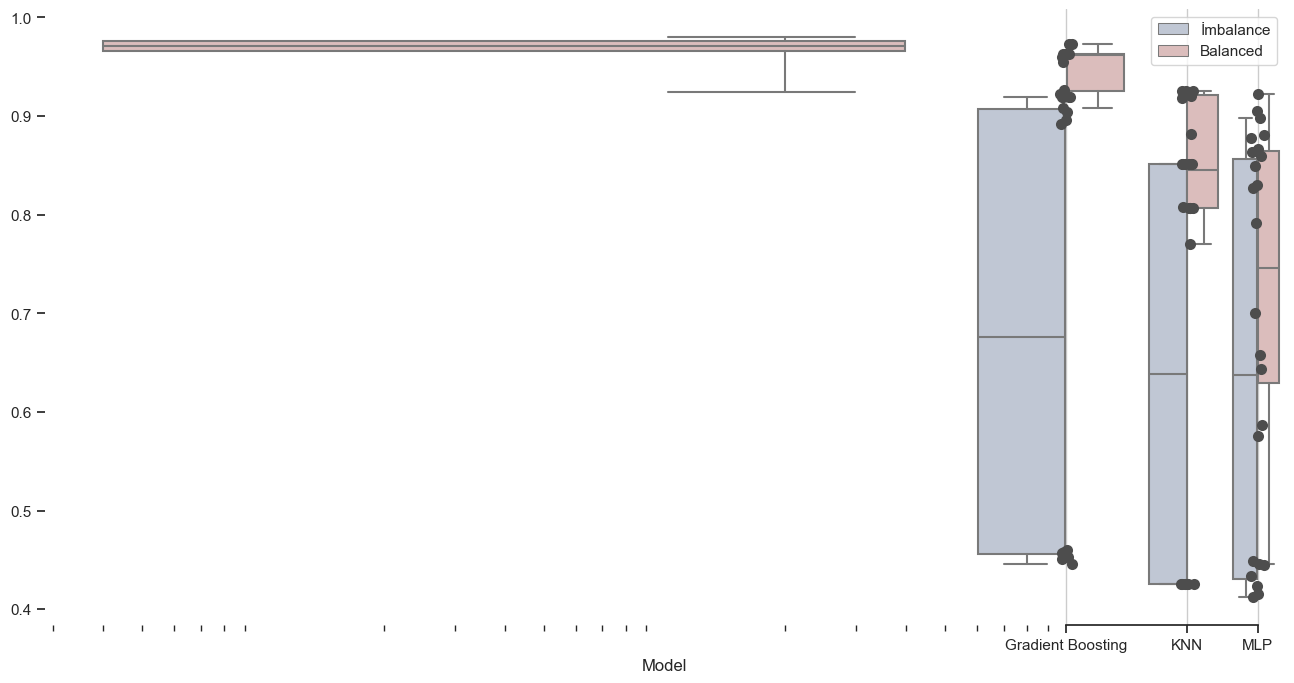

In [192]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="ticks")

# Initialize the figure with a logarithmic x axis
f, ax = plt.subplots(figsize=(16, 8))
ax.set_xscale("log")

# Load the example planets dataset
planets = df_result

# Plot the orbital period with horizontal boxes

sns.boxplot(
    planets,  x="Model", y="F1_score", hue="Dataset Mode",
    whis=[0, 100], width=.8, palette="vlag"
)


# Add in points to show each observation
sns.stripplot(planets, x="Model", y="F1_score", size=8, color=".3")

# Tweak the visual presentation
ax.xaxis.grid(True)
ax.set(ylabel="")
sns.despine(trim=True, left=True)

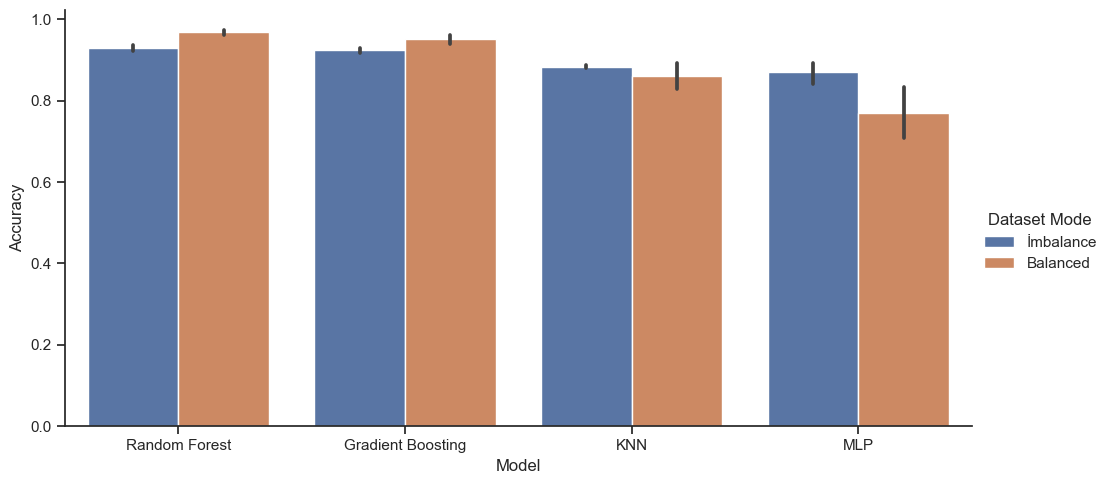

In [165]:

sns.catplot(data=df_result, x="Model", y="Accuracy", hue="Dataset Mode", kind="bar",height=5,
    aspect=2)

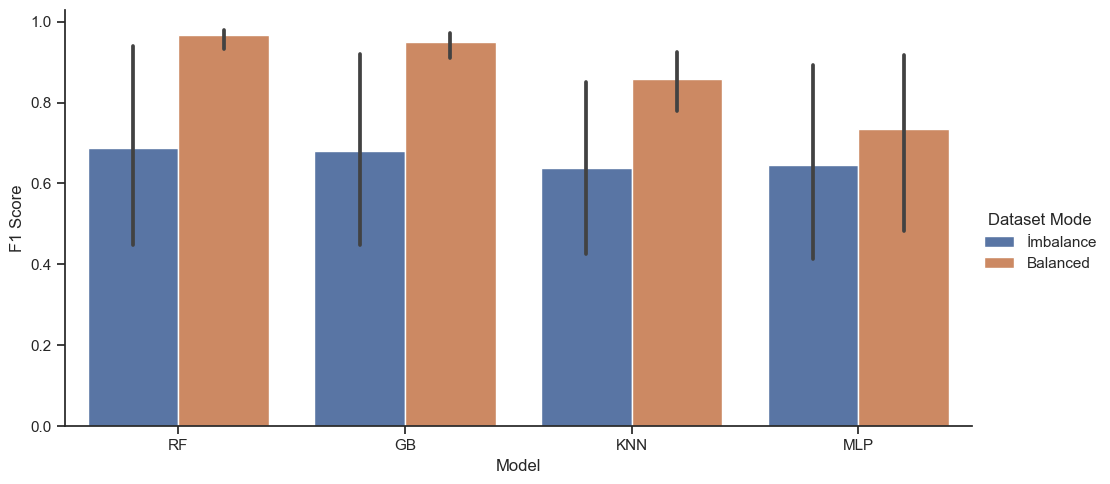

In [301]:
sns.catplot(data=df_result, x="Model", y="F1 Score",hue="Dataset Mode", errorbar=("pi", 95), kind="bar",height=5,
    aspect=2)


C:\Users\Ugur Ejder\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Ugur Ejder\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Ugur Ejder\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


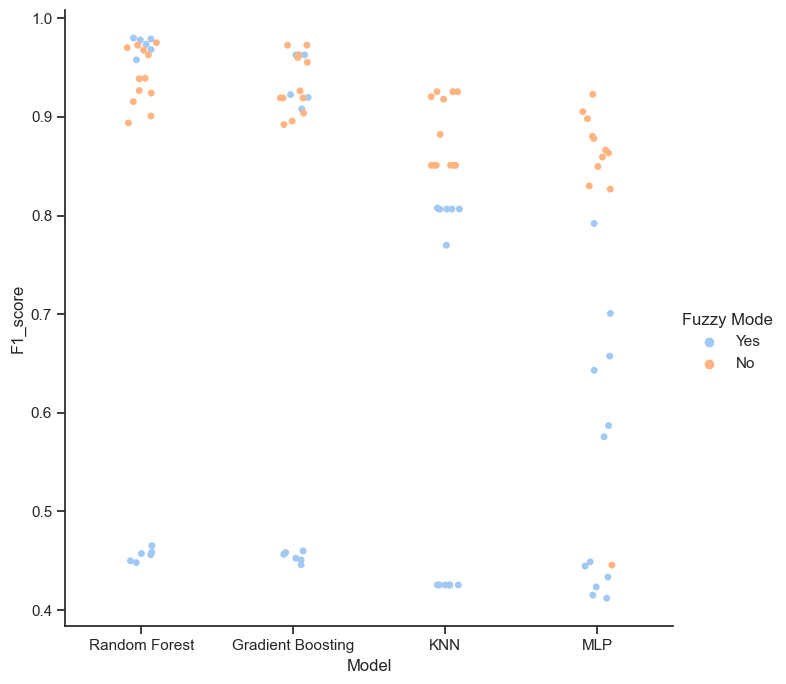

In [169]:
sns.catplot(
    data=df_result, x="Model", y = "F1_score", hue="Fuzzy Mode", errorbar=('ci', 95), kind="strip",
    palette="pastel", edgecolor="1", height=7
)

In [91]:
import os

In [92]:
os.getcwd()

'C:\\Users\\Ugur Ejder\\Desktop\\crowdfunding'

In [149]:
xl_result = pd.ExcelFile("result_4.xlsx")
df_result_2 = xl_result.parse('result_4')

In [150]:
df_result_2.columns

Index(['No', 'Model', 'Feature_Selection', 'Accuracy', 'F1_score', 'Recall',
       'Precision', 'Dataset Mode', 'Fuzzy Mode'],
      dtype='object')

C:\Users\Ugur Ejder\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Ugur Ejder\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Ugur Ejder\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


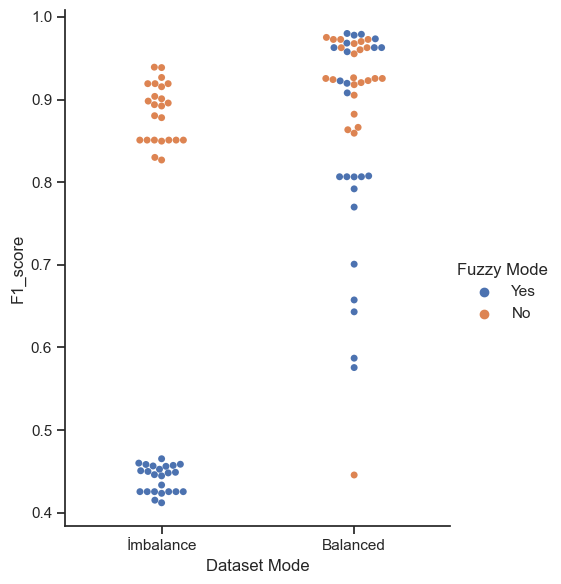

In [209]:
sns.catplot(
    data=df_result, x="Dataset Mode", y="F1_score", hue="Fuzzy Mode",
    kind="swarm", aspect=.8, height = 6
)

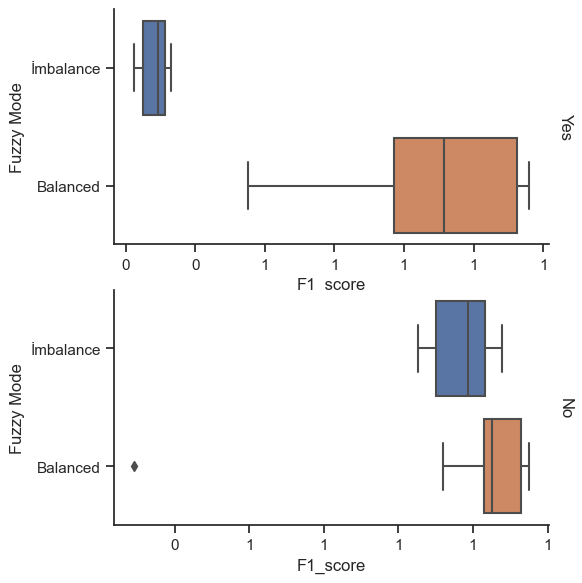

In [173]:
g = sns.catplot(
    data=df_result,
    x="F1_score", y="Dataset Mode", row="Fuzzy Mode",
    kind="box", orient="h",
    sharex=False, margin_titles=True,
    height=3, aspect=2,
)
g.set(xlabel="F1_score", ylabel="Fuzzy Mode")
g.set_titles(row_template="{row_name}")
for ax in g.axes.flat:
    ax.xaxis.set_major_formatter('{x:.0f}')

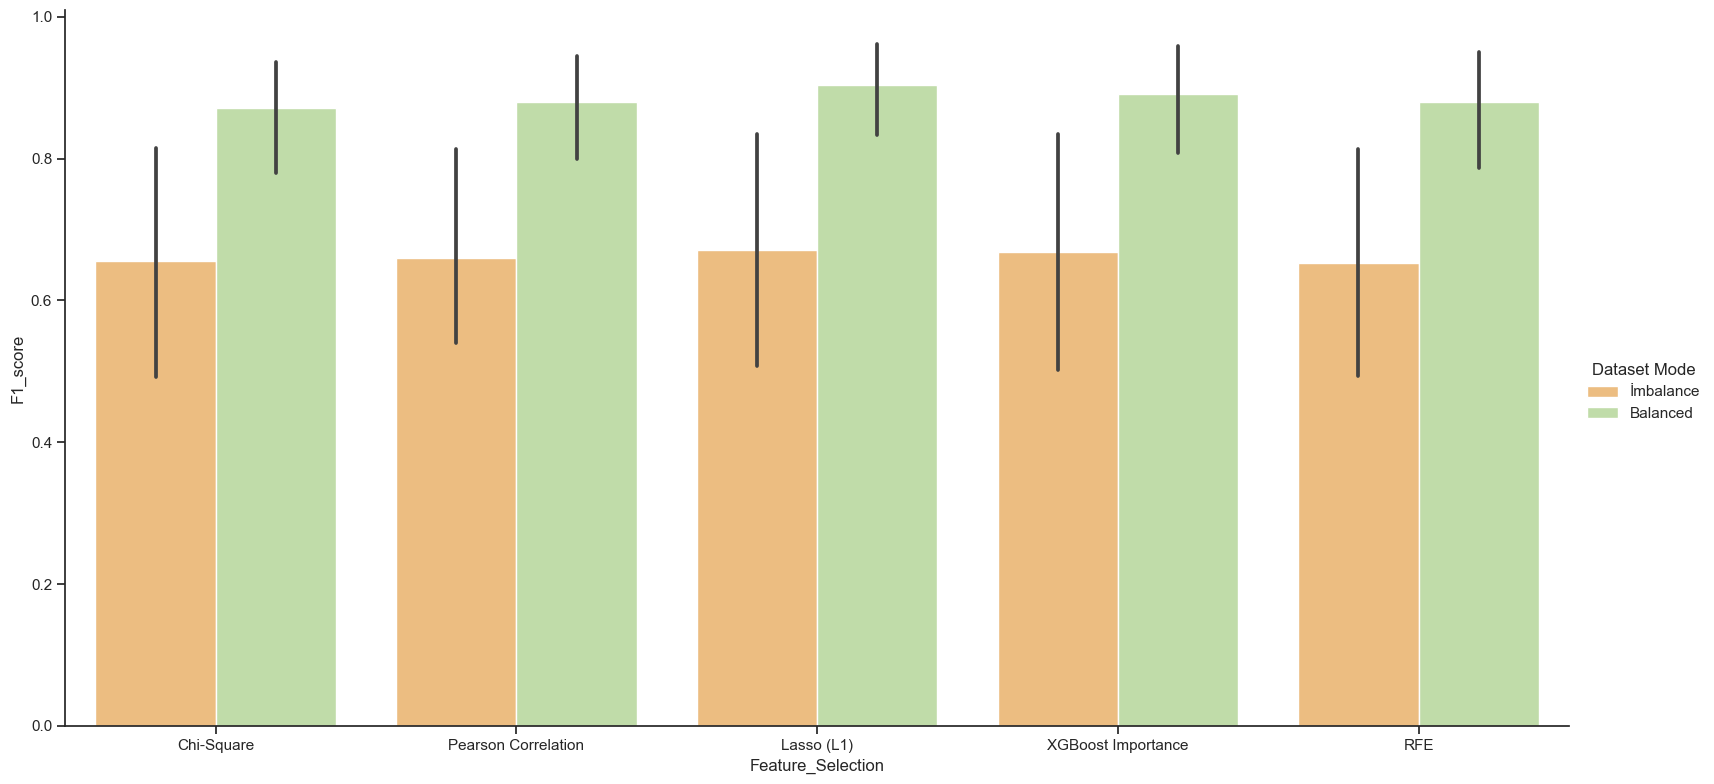

In [175]:
sns.catplot(data=df_result, x="Feature_Selection", y="F1_score", hue="Dataset Mode", kind="bar" , height=8, palette="Spectral",
    aspect=2,)

C:\Users\Ugur Ejder\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Ugur Ejder\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\Ugur Ejder\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\Ugur Ejder\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When

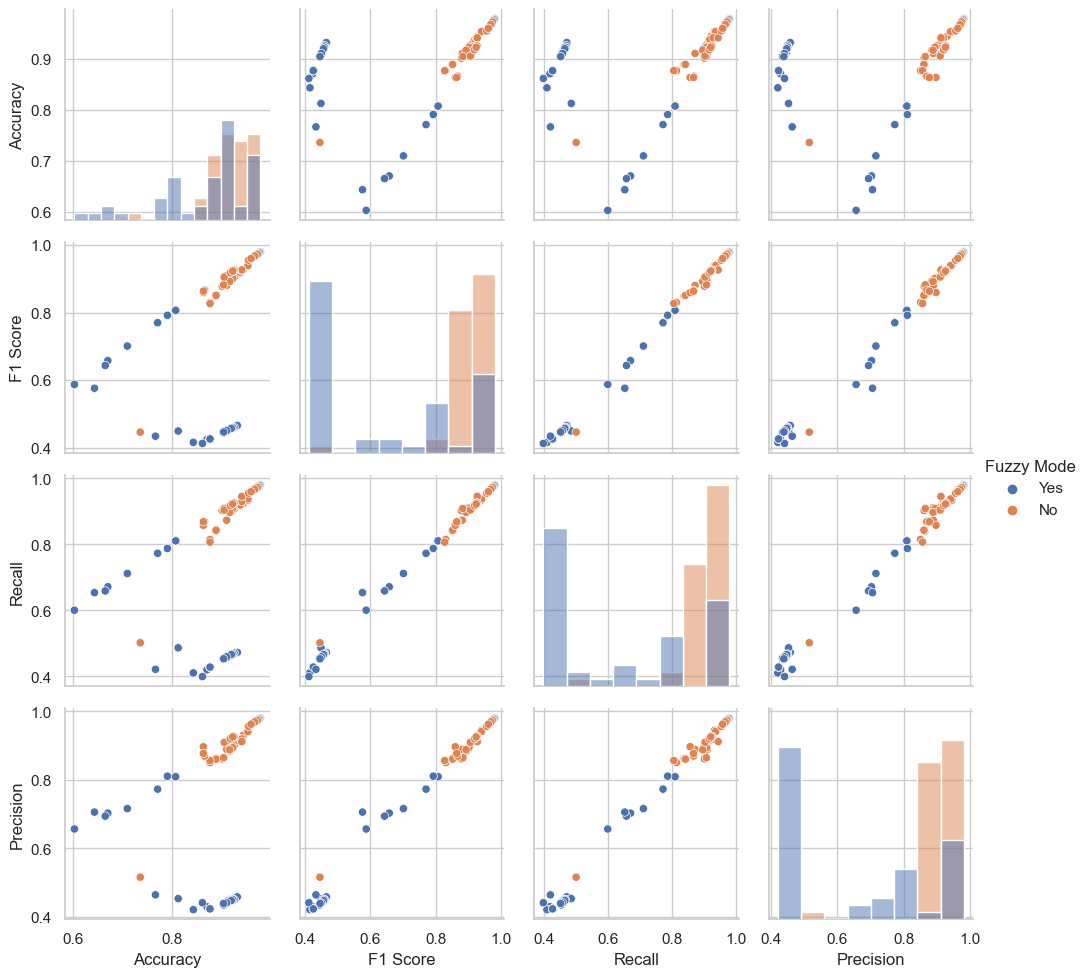

In [318]:
g = sns.PairGrid(df_result, hue="Fuzzy Mode")
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
g.add_legend()

C:\Users\Ugur Ejder\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Ugur Ejder\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\Ugur Ejder\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\Ugur Ejder\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When

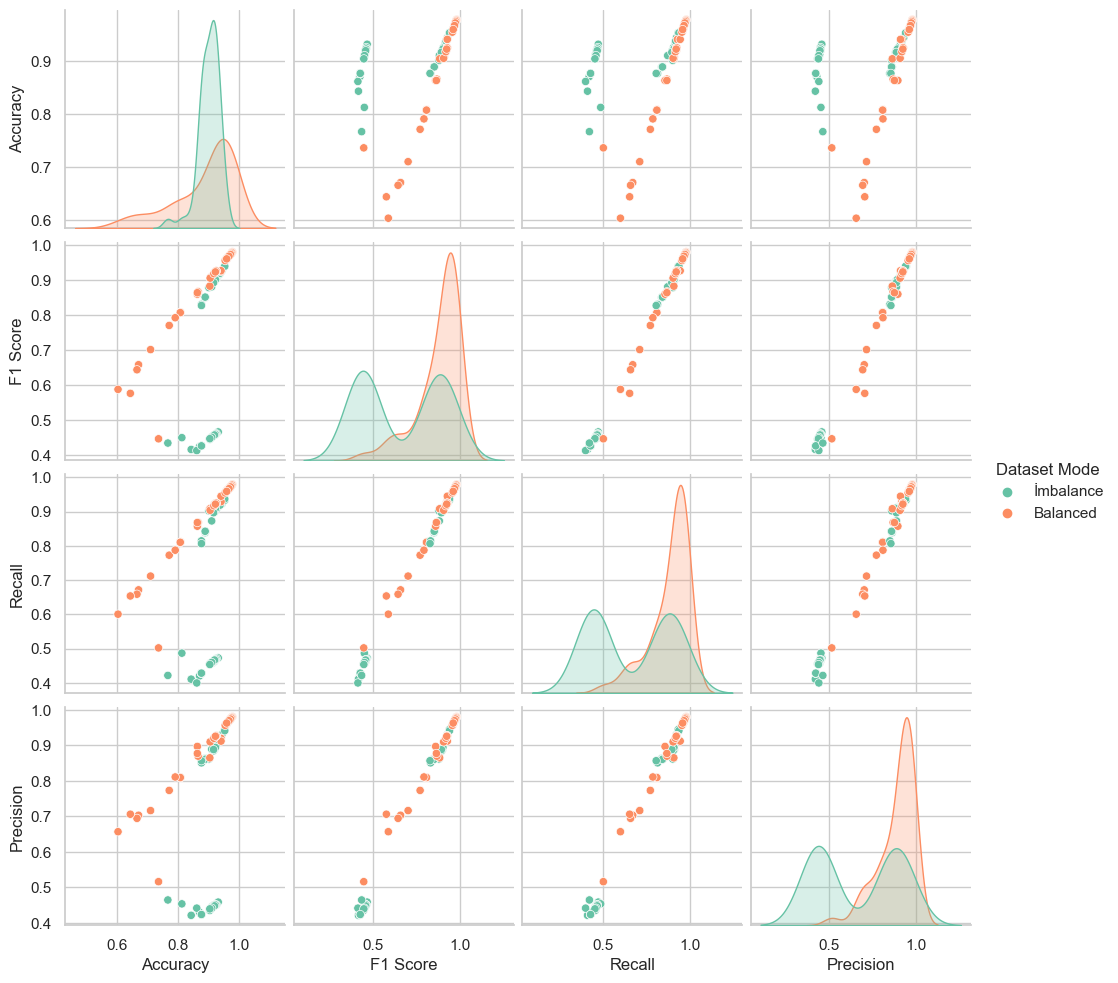

In [319]:
g = sns.pairplot(df_result, hue="Dataset Mode", palette="Set2", diag_kind="kde", height=2.5)


In [200]:
df_result.columns

Index(['Model', 'Feature_Selection', 'Accuracy', 'F1_score', 'Recall',
       'Precision', 'Dataset Mode', 'Fuzzy Mode'],
      dtype='object')

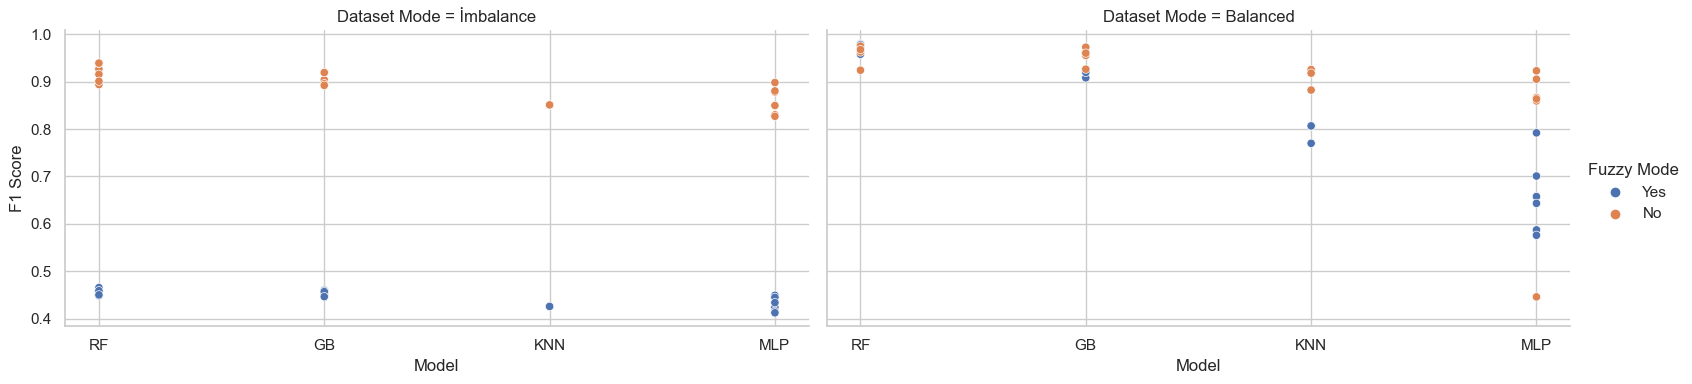

In [317]:
sns.relplot(
    data=df_result,
    x="Model", y="F1 Score", hue="Fuzzy Mode", col="Dataset Mode",   height=4,
    aspect=2,
)

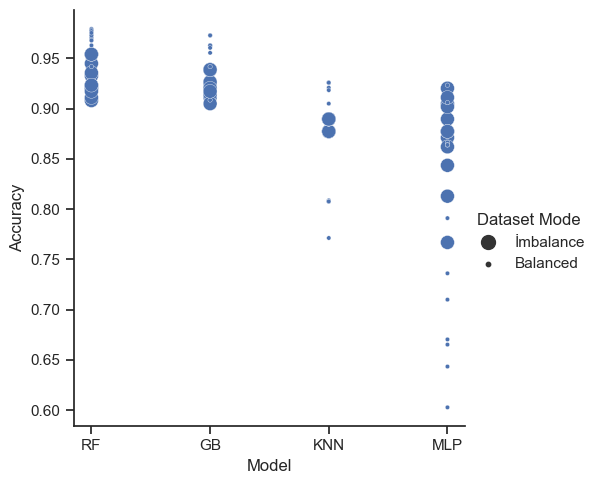

In [226]:
sns.relplot(
    data=df_result, x="Model", y="Accuracy",
    size="Dataset Mode", sizes=(10, 100)
)

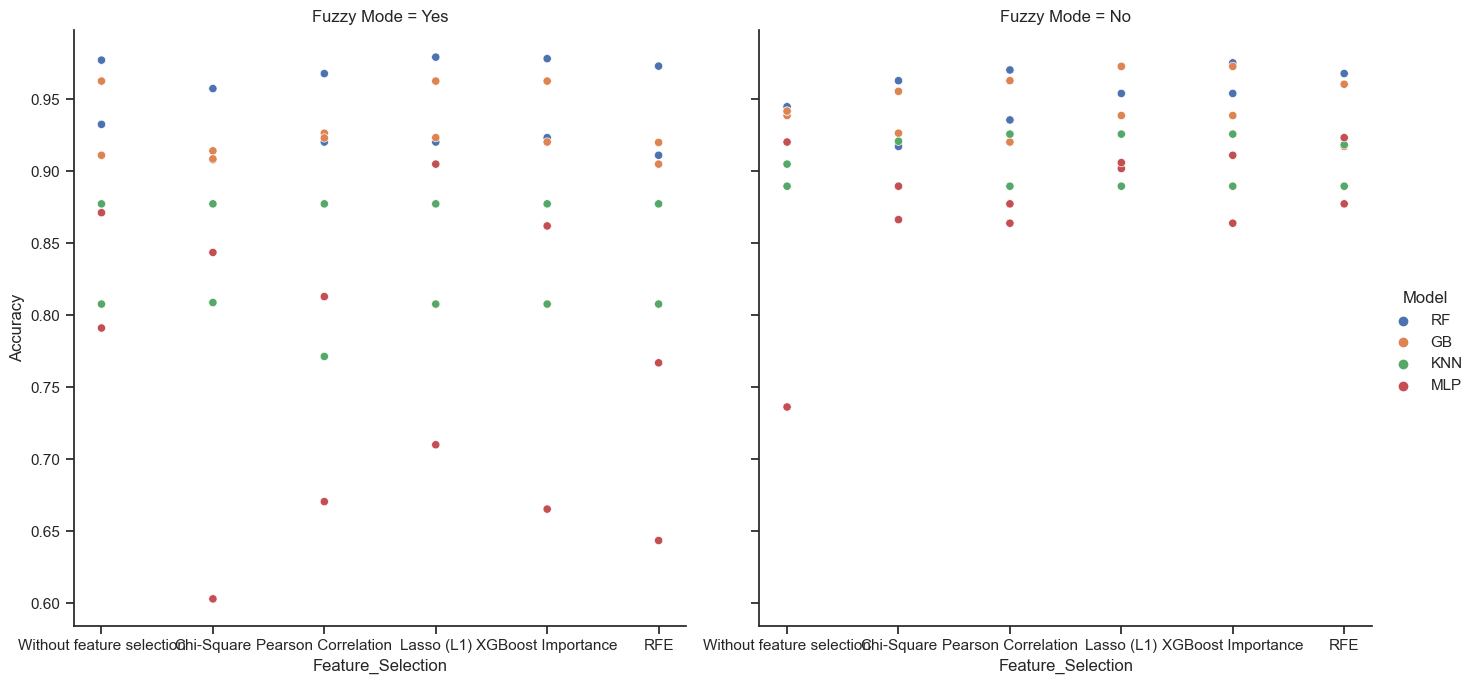

In [237]:
sns.relplot(
    data=df_result, x="Feature_Selection", y="Accuracy", hue="Model",  height=7, col="Fuzzy Mode",
    aspect=1,
)

In [261]:
df_result.columns


Index(['Model', 'Feature_Selection', 'Accuracy', 'F1_score', 'Recall',
       'Precision', 'Dataset Mode', 'Fuzzy Mode', 'Model-Feature_Selection'],
      dtype='object')

In [263]:
df_result.sort_values(by="F1_score",ascending=False)

,Model,Feature_Selection,Accuracy,F1_score,Recall,Precision,Dataset Mode,Fuzzy Mode,Model-Feature_Selection
32,RF,Lasso (L1),0.979210,0.979920,0.979770,0.980215,Balanced,Yes,RF-LS
36,RF,XGBoost Importance,0.978170,0.978925,0.978931,0.979090,Balanced,Yes,RF-XGB
44,RF,Without feature selection,0.977131,0.977847,0.977706,0.978176,Balanced,Yes,RF
88,RF,XGBoost Importance,0.975248,0.975160,0.974535,0.976219,Balanced,No,RF-XGB
40,RF,RFE,0.972973,0.973427,0.973960,0.973093,Balanced,Yes,RF-RFE
...,...,...,...,...,...,...,...,...,...
22,KNN,RFE,0.877301,0.425543,0.428007,0.423501,İmbalance,Yes,KNN-RFE
2,KNN,Without feature selection,0.877301,0.425543,0.428007,0.423501,İmbalance,Yes,KNN
3,MLP,Without feature selection,0.871166,0.423528,0.420039,0.429677,İmbalance,Yes,MLP
7,MLP,Chi-Square,0.843558,0.415240,0.410424,0.421193,İmbalance,Yes,MLP-CS


In [311]:
df_result.columns

Index(['Model', 'Feature_Selection', 'Accuracy', 'F1 Score', 'Recall',
       'Precision', 'Dataset Mode', 'Fuzzy Mode', 'Model - Feature Selection'],
      dtype='object')

<Axes: xlabel='F1 Score', ylabel='Model - Feature Selection'>

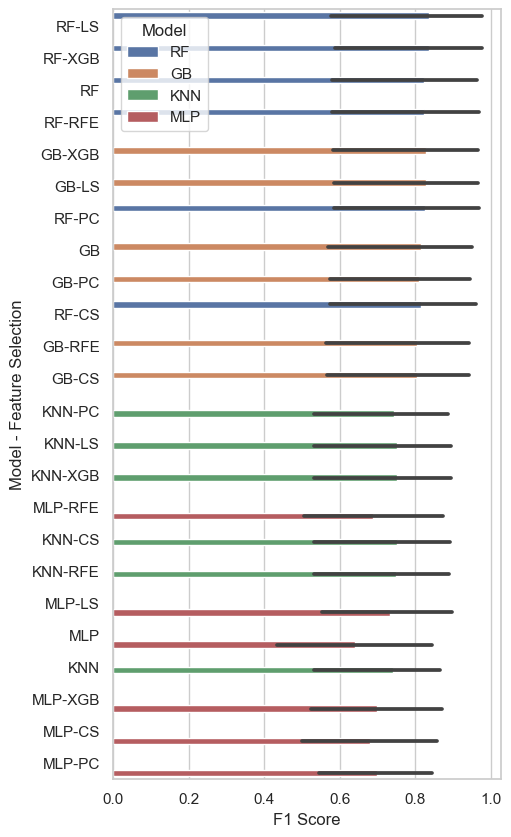

In [312]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(5, 10))

# Plot the total crashes
#sns.set_color_codes("pastel")
sns.color_palette("husl", 9)
sns.barplot(x="F1 Score", y="Model - Feature Selection", hue ="Model" , data=df_result.sort_values(by="F1 Score",ascending=False),
        )

C:\Users\Ugur Ejder\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Ugur Ejder\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Ugur Ejder\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


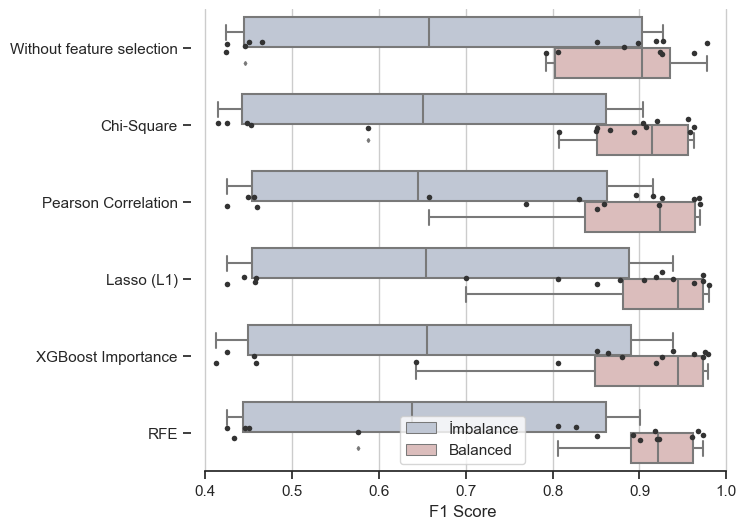

In [307]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="ticks")

# Initialize the figure with a logarithmic x axis
f, ax = plt.subplots(figsize=(7, 6))
#ax.set_xscale("log")

# Load the example planets dataset
planets = df_result

# Plot the orbital period with horizontal boxes
sns.boxplot(
    planets, x="F1 Score", y="Feature_Selection", hue="Dataset Mode",
      palette="vlag",  saturation=0.75, width=0.8, dodge=True, fliersize=2, whis=2.5, )



# Add in points to show each observation
sns.stripplot(planets, x="F1 Score", y="Feature_Selection", size=4, color=".2" ,)

# Tweak the visual presentation
ax.xaxis.grid(True)
ax.set(ylabel="")
sns.despine(trim=True, left=True)